In [1]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")

In [3]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323747 entries, 0 to 3323746
Data columns (total 43 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   HourUTC          3323747 non-null  object 
 1   HourDK           3323747 non-null  object 
 2   Consumption_MWh  3323747 non-null  float64
 3   DK3619Code       3323747 non-null  object 
 4   hour             3323747 non-null  int64  
 5   day_of_week      3323747 non-null  int64  
 6   quarter          3323747 non-null  int64  
 7   month            3323747 non-null  int64  
 8   year             3323747 non-null  int64  
 9   day_of_year      3323747 non-null  int64  
 10  day_of_month     3323747 non-null  int64  
 11  week_of_year     3323747 non-null  int64  
 12  season           3323747 non-null  object 
 13  holiday          3323747 non-null  int64  
 14  DK36Code         3323747 non-null  object 
 15  DK36Title        3323747 non-null  object 
 16  DK19Code         3

In [4]:
import pandas as pd

# Giả sử dữ liệu của bạn được đọc vào một DataFrame có tên là df
# df = pd.read_csv('file_path.csv')  # Đọc dữ liệu từ file CSV nếu cần

# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()

# Kiểm tra lại kết quả
print(df_cleaned.info(show_counts = True))


<class 'pandas.core.frame.DataFrame'>
Index: 3322211 entries, 1536 to 3323746
Data columns (total 43 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   HourUTC          3322211 non-null  object 
 1   HourDK           3322211 non-null  object 
 2   Consumption_MWh  3322211 non-null  float64
 3   DK3619Code       3322211 non-null  object 
 4   hour             3322211 non-null  int64  
 5   day_of_week      3322211 non-null  int64  
 6   quarter          3322211 non-null  int64  
 7   month            3322211 non-null  int64  
 8   year             3322211 non-null  int64  
 9   day_of_year      3322211 non-null  int64  
 10  day_of_month     3322211 non-null  int64  
 11  week_of_year     3322211 non-null  int64  
 12  season           3322211 non-null  object 
 13  holiday          3322211 non-null  int64  
 14  DK36Code         3322211 non-null  object 
 15  DK36Title        3322211 non-null  object 
 16  DK19Code         332

In [5]:
df

HourUTC               HourDK  Consumption_MWh  \
0        2024-06-21T21:00:00  2024-06-21 23:00:00       145.018660   
1        2024-06-21T21:00:00  2024-06-21 23:00:00       189.913841   
2        2024-06-21T21:00:00  2024-06-21 23:00:00        27.199219   
3        2024-06-21T21:00:00  2024-06-21 23:00:00       174.295128   
4        2024-06-21T21:00:00  2024-06-21 23:00:00       105.906493   
...                      ...                  ...              ...   
3323742  2012-06-02T00:00:00  2012-06-02 02:00:00         2.438383   
3323743  2012-06-02T00:00:00  2012-06-02 02:00:00         6.785315   
3323744  2012-06-02T00:00:00  2012-06-02 02:00:00         4.623429   
3323745  2012-06-01T23:00:00  2012-06-02 01:00:00         8.836999   
3323746  2012-06-01T23:00:00  2012-06-02 01:00:00         0.068992   

         DK3619Code  hour  day_of_week  quarter  month  year  day_of_year  \
0               A_A    23            4        2      6  2024          173   
1              C_CA    23            4        2      6  2024          173   
2              C_CC    23            4        2      6  2024          173   
3        C_CE_CF_CD    23            4        2      6  2024          173   
4              C_CG    23            4        2      6  2024          173   
...             ...   ...          ...      ...    ...   ...          ...   
3323742        Q_QB     2            5        2      6  2012          154   
3323743         R_R     2            5        2      6  2012          154   
3323744         S_S     2            5        2      6  2012          154   
3323745  C_CE_CF_CD     1            5        2      6  2012          154   
3323746        M_MA     1            5        2      6  2012          154   

         ...     lag_39     lag_40     lag_41     lag_42     lag_43  \
0        ...        NaN        NaN        NaN        NaN        NaN   
1        ...        NaN        NaN        NaN        NaN        NaN   
2        ...        NaN        NaN        NaN        NaN        NaN   
3        ...        NaN        NaN        NaN        NaN        NaN   
4        ...        NaN        NaN        NaN        NaN        NaN   
...      ...        ...        ...        ...        ...        ...   
3323742  ...   3.108201   3.126827   3.023678   2.866484   2.820939   
3323743  ...  12.402893  10.508372   9.916469   9.461908   9.068830   
3323744  ...   5.796867   5.738428   5.652700   5.506376   5.288036   
3323745  ...  91.046097  91.284279  89.049355  89.252098  89.765175   
3323746  ...  13.291220  12.806107  12.303267  12.256860  12.272120   

            lag_44     lag_45     lag_46     lag_47     lag_48  
0              NaN        NaN        NaN        NaN        NaN  
1              NaN        NaN        NaN        NaN        NaN  
2              NaN        NaN        NaN        NaN        NaN  
3              NaN        NaN        NaN        NaN        NaN  
4              NaN        NaN        NaN        NaN        NaN  
...            ...        ...        ...        ...        ...  
3323742   2.815171   2.617049   2.506001   2.406096   2.346820  
3323743   7.965182   7.309664   6.615989   6.384649   6.263380  
3323744   5.191219   4.872910   4.746281   4.599324   4.533605  
3323745  90.157410  90.200378  90.050140  90.148186  88.965591  
3323746  12.317976  12.165403  11.817548  11.546525  11.733844  

[3323747 rows x 43 columns]

In [6]:
df_cleaned

HourUTC               HourDK  Consumption_MWh  \
1536     2024-06-19T21:00:00  2024-06-19 23:00:00       144.276350   
1537     2024-06-19T21:00:00  2024-06-19 23:00:00       231.498108   
1538     2024-06-19T21:00:00  2024-06-19 23:00:00        48.562569   
1539     2024-06-19T21:00:00  2024-06-19 23:00:00       169.283123   
1540     2024-06-19T21:00:00  2024-06-19 23:00:00       131.341630   
...                      ...                  ...              ...   
3323742  2012-06-02T00:00:00  2012-06-02 02:00:00         2.438383   
3323743  2012-06-02T00:00:00  2012-06-02 02:00:00         6.785315   
3323744  2012-06-02T00:00:00  2012-06-02 02:00:00         4.623429   
3323745  2012-06-01T23:00:00  2012-06-02 01:00:00         8.836999   
3323746  2012-06-01T23:00:00  2012-06-02 01:00:00         0.068992   

         DK3619Code  hour  day_of_week  quarter  month  year  day_of_year  \
1536            A_A    23            2        2      6  2024          171   
1537           C_CA    23            2        2      6  2024          171   
1538           C_CC    23            2        2      6  2024          171   
1539     C_CE_CF_CD    23            2        2      6  2024          171   
1540           C_CG    23            2        2      6  2024          171   
...             ...   ...          ...      ...    ...   ...          ...   
3323742        Q_QB     2            5        2      6  2012          154   
3323743         R_R     2            5        2      6  2012          154   
3323744         S_S     2            5        2      6  2012          154   
3323745  C_CE_CF_CD     1            5        2      6  2012          154   
3323746        M_MA     1            5        2      6  2012          154   

         ...      lag_39      lag_40      lag_41      lag_42      lag_43  \
1536     ...  165.027396  164.440383  169.700589  175.353635  178.585902   
1537     ...  239.095111  228.780102  223.575849  212.865753  207.463201   
1538     ...   44.305569   38.158294   38.645774   35.878273   33.083386   
1539     ...  187.921766  183.989653  181.960003  180.901008  180.189918   
1540     ...  136.048712  129.262317  125.600607  120.292010  115.927053   
...      ...         ...         ...         ...         ...         ...   
3323742  ...    3.108201    3.126827    3.023678    2.866484    2.820939   
3323743  ...   12.402893   10.508372    9.916469    9.461908    9.068830   
3323744  ...    5.796867    5.738428    5.652700    5.506376    5.288036   
3323745  ...   91.046097   91.284279   89.049355   89.252098   89.765175   
3323746  ...   13.291220   12.806107   12.303267   12.256860   12.272120   

             lag_44      lag_45      lag_46      lag_47      lag_48  
1536     173.246406  168.106920  161.731316  153.871964  145.018660  
1537     203.775228  199.219978  195.636316  191.678519  189.913841  
1538      30.561406   30.501629   29.834127   28.817668   27.199219  
1539     177.923610  177.429911  176.997648  174.519194  174.295128  
1540     111.587570  109.688920  107.681606  105.843225  105.906493  
...             ...         ...         ...         ...         ...  
3323742    2.815171    2.617049    2.506001    2.406096    2.346820  
3323743    7.965182    7.309664    6.615989    6.384649    6.263380  
3323744    5.191219    4.872910    4.746281    4.599324    4.533605  
3323745   90.157410   90.200378   90.050140   90.148186   88.965591  
3323746   12.317976   12.165403   11.817548   11.546525   11.733844  

[3322211 rows x 43 columns]

### Choose Feauture will use for Model

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3322211 entries, 1536 to 3323746
Data columns (total 43 columns):
 #   Column           Dtype  
---  ------           -----  
 0   HourUTC          object 
 1   HourDK           object 
 2   Consumption_MWh  float64
 3   DK3619Code       object 
 4   hour             int64  
 5   day_of_week      int64  
 6   quarter          int64  
 7   month            int64  
 8   year             int64  
 9   day_of_year      int64  
 10  day_of_month     int64  
 11  week_of_year     int64  
 12  season           object 
 13  holiday          int64  
 14  DK36Code         object 
 15  DK36Title        object 
 16  DK19Code         object 
 17  DK19Title        object 
 18  lag_24           float64
 19  lag_25           float64
 20  lag_26           float64
 21  lag_27           float64
 22  lag_28           float64
 23  lag_29           float64
 24  lag_30           float64
 25  lag_31           float64
 26  lag_32           float64
 27  lag_33        

In [8]:
df_cleaned['DK3619Code'].unique()

array(['A_A', 'C_CA', 'C_CC', 'C_CE_CF_CD', 'C_CG', 'C_CH', 'C_CI',
       'C_CJ', 'C_CK', 'C_CL', 'C_CM_CB', 'D_D', 'E_E', 'F_F', 'G_G',
       'H_H', 'I_I', 'J_JA', 'J_JB_JC', 'K_K', 'L_L', 'M_MA', 'M_MB',
       'M_MC', 'N_N', 'O_O', 'P_P', 'PR_PR', 'Q_QA', 'Q_QB', 'R_R', 'S_S'],
      dtype=object)

In [9]:
columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'M_MA']

df_corr = df_filter[columns]
#df_corr = pd.get_dummies(df_corr, columns=['DK3619Code'], prefix=['DK3619Code'])


In [10]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105623 entries, 1557 to 3323746
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   HourUTC          105623 non-null  object 
 1   HourDK           105623 non-null  object 
 2   hour             105623 non-null  int64  
 3   day_of_week      105623 non-null  int64  
 4   quarter          105623 non-null  int64  
 5   month            105623 non-null  int64  
 6   year             105623 non-null  int64  
 7   day_of_year      105623 non-null  int64  
 8   day_of_month     105623 non-null  int64  
 9   week_of_year     105623 non-null  int64  
 10  season           105623 non-null  object 
 11  holiday          105623 non-null  int64  
 12  lag_24           105623 non-null  float64
 13  lag_25           105623 non-null  float64
 14  lag_26           105623 non-null  float64
 15  lag_27           105623 non-null  float64
 16  lag_28           105623 non-null  float

In [11]:
### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df_corr['season'] = df_corr['season'].map(seasons_mapping)

/tmp/ipykernel_25/3343511339.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['season'] = df_corr['season'].map(seasons_mapping)


In [12]:
# Convert holiday to binary indicator
df_corr['holiday'] = df_corr['holiday'].apply(lambda x: 0 if x == 0 else 1)

/tmp/ipykernel_25/3026962626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['holiday'] = df_corr['holiday'].apply(lambda x: 0 if x == 0 else 1)


In [13]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

/tmp/ipykernel_25/1245307159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1245307159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


In [14]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105623 entries, 1557 to 3323746
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   HourUTC          105623 non-null  datetime64[ns]
 1   HourDK           105623 non-null  datetime64[ns]
 2   hour             105623 non-null  int64         
 3   day_of_week      105623 non-null  int64         
 4   quarter          105623 non-null  int64         
 5   month            105623 non-null  int64         
 6   year             105623 non-null  int64         
 7   day_of_year      105623 non-null  int64         
 8   day_of_month     105623 non-null  int64         
 9   week_of_year     105623 non-null  int64         
 10  season           105623 non-null  int64         
 11  holiday          105623 non-null  int64         
 12  lag_24           105623 non-null  float64       
 13  lag_25           105623 non-null  float64       
 14  lag_26           1056

### Split data

In [15]:
df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)

In [16]:
# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])

In [17]:
df_train.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 67200 entries, 3323746 to 1231093
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hour             67200 non-null  int64  
 1   day_of_week      67200 non-null  int64  
 2   quarter          67200 non-null  int64  
 3   month            67200 non-null  int64  
 4   year             67200 non-null  int64  
 5   day_of_year      67200 non-null  int64  
 6   day_of_month     67200 non-null  int64  
 7   week_of_year     67200 non-null  int64  
 8   season           67200 non-null  int64  
 9   holiday          67200 non-null  int64  
 10  lag_24           67200 non-null  float64
 11  lag_25           67200 non-null  float64
 12  lag_26           67200 non-null  float64
 13  lag_27           67200 non-null  float64
 14  lag_28           67200 non-null  float64
 15  lag_29           67200 non-null  float64
 16  lag_30           67200 non-null  float64
 17  lag_31   

In [18]:
df_test.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208789 to 1557
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hour             37727 non-null  int64  
 1   day_of_week      37727 non-null  int64  
 2   quarter          37727 non-null  int64  
 3   month            37727 non-null  int64  
 4   year             37727 non-null  int64  
 5   day_of_year      37727 non-null  int64  
 6   day_of_month     37727 non-null  int64  
 7   week_of_year     37727 non-null  int64  
 8   season           37727 non-null  int64  
 9   holiday          37727 non-null  int64  
 10  lag_24           37727 non-null  float64
 11  lag_25           37727 non-null  float64
 12  lag_26           37727 non-null  float64
 13  lag_27           37727 non-null  float64
 14  lag_28           37727 non-null  float64
 15  lag_29           37727 non-null  float64
 16  lag_30           37727 non-null  float64
 17  lag_31      

### Train data

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/1485810032.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

## Predict

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208789 to 1557
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208789 2020-03-01 00:00:00  32.316631   32.303467       0.000173
1208757 2020-03-01 01:00:00  31.509554   31.930479       0.177178
1208725 2020-03-01 02:00:00  31.603830   31.839178       0.055389
1208693 2020-03-01 03:00:00  31.697868   31.786899       0.007926
1208661 2020-03-01 04:00:00  31.886505   31.725630       0.025881


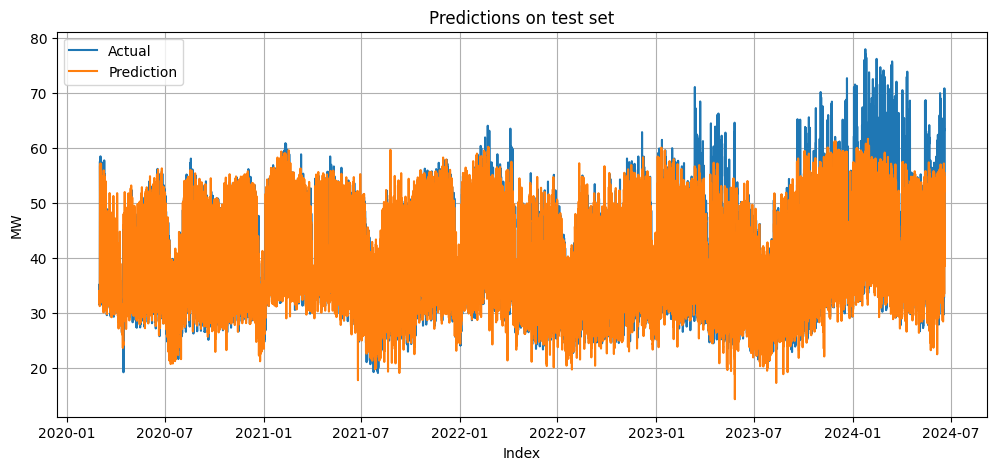

In [20]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 2.554500875375991
Mean Squared Error (MSE): 18.913686730216988
Root Mean Squared Error (RMSE): 4.34898686250223
R-squared (R²): 0.7874894389520983
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.715888
1    day_of_week    0.150718
0           hour    0.022662
4           year    0.017908
9        holiday    0.009593
26        lag_40    0.007428
24        lag_38    0.005703
25        lag_39    0.005542
11        lag_25    0.005525
23        lag_37    0.005064
12        lag_26    0.004405
34        lag_48    0.004308
5    day_of_year    0.003876
6   day_of_month    0.003288
22        lag_36    0.002930
33        lag_47    0.002733
7   week_of_year    0.002650
27        lag_41    0.002548
13        lag_27    0.002366
19        lag_33    0.002160
14        lag_28    0.002047
32        lag_46    0.001957
18        lag_32    0.001913
20        lag_34    0.001864
15        lag_29    0.001780
21        lag_35    0.0

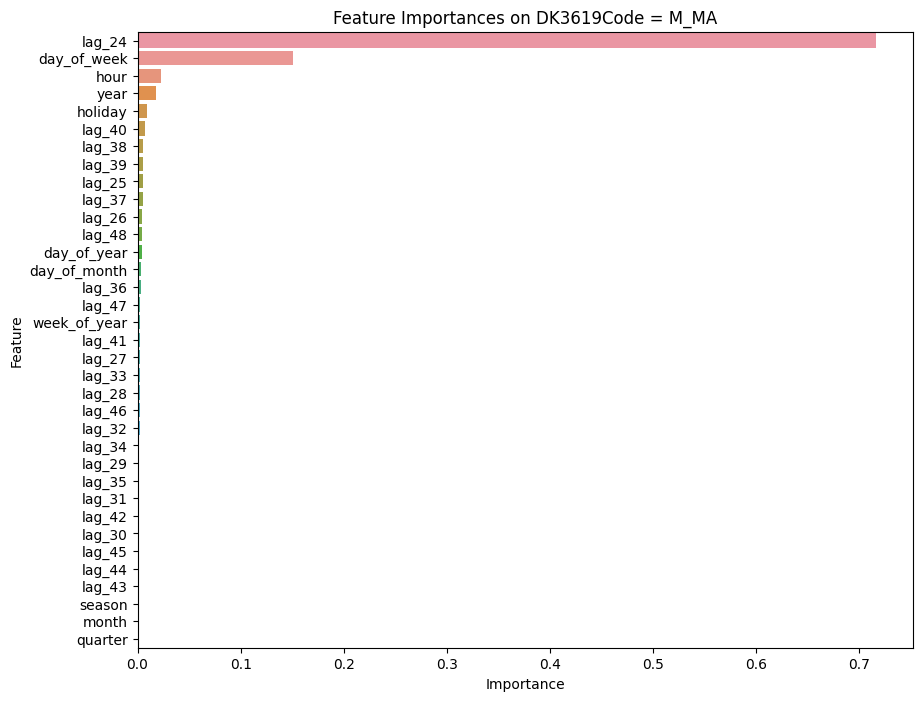

In [21]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = M_MA')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Thử nghiệm qua từng DK3619Code

## DK3619Code = A_A

In [22]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'A_A']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/810567977.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/810567977.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/810567977.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208768 to 1536
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK      actual  prediction  squared_error
1208768 2020-03-01 00:00:00  185.306870  181.649698      13.374905
1208736 2020-03-01 01:00:00  184.581589  181.505956       9.459519
1208704 2020-03-01 02:00:00  185.329773  182.503078       7.990203
1208672 2020-03-01 03:00:00  190.601608  191.042296       0.194206
1208640 2020-03-01 04:00:00  208.875351  205.673301      10.253122


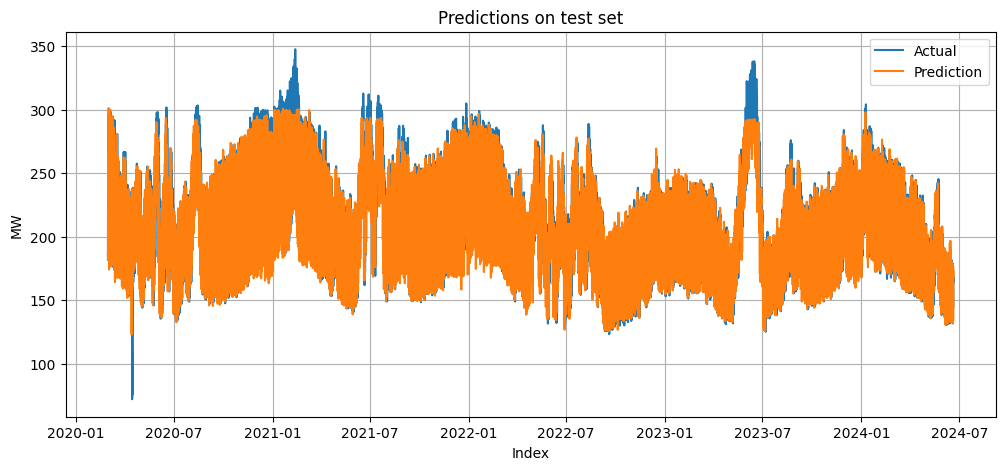

In [23]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 7.253858101065019
Mean Squared Error (MSE): 116.63782168061283
Root Mean Squared Error (RMSE): 10.79989915140937
R-squared (R²): 0.9120113759906214
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.914888
34        lag_48    0.069044
1    day_of_week    0.002957
5    day_of_year    0.000824
33        lag_47    0.000792
6   day_of_month    0.000723
23        lag_37    0.000716
22        lag_36    0.000578
32        lag_46    0.000567
11        lag_25    0.000520
24        lag_38    0.000505
20        lag_34    0.000480
21        lag_35    0.000479
31        lag_45    0.000472
19        lag_33    0.000472
30        lag_44    0.000413
29        lag_43    0.000411
18        lag_32    0.000410
12        lag_26    0.000381
13        lag_27    0.000367
28        lag_42    0.000363
17        lag_31    0.000361
25        lag_39    0.000350
16        lag_30    0.000347
15        lag_29    0.000344
14        lag_28    0.

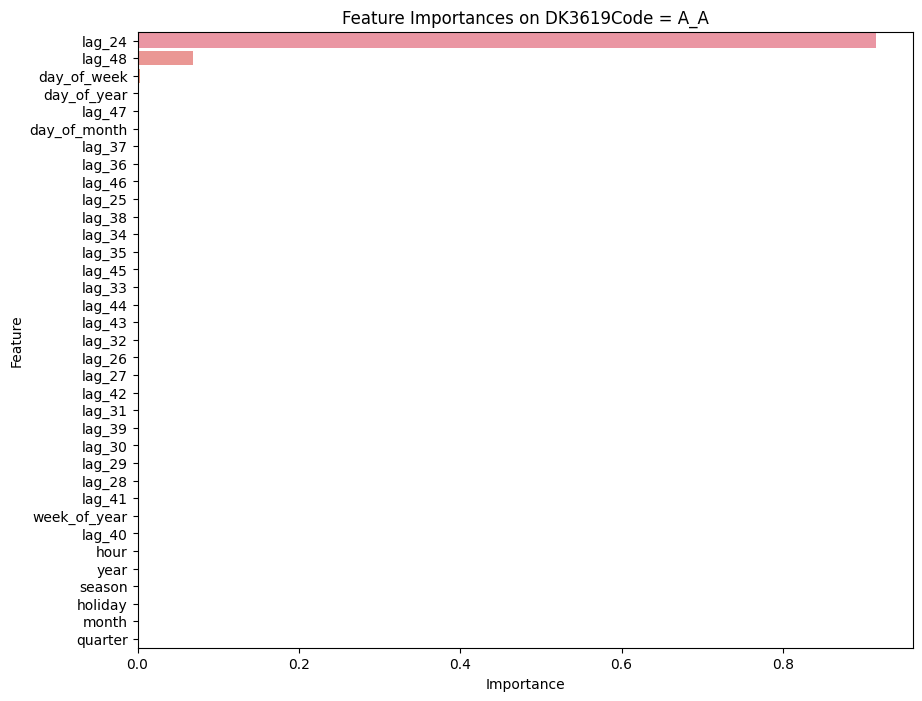

In [24]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = A_A')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = C_CA

In [25]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'C_CA']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/3606450680.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/3606450680.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/3606450680.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208769 to 1537
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK      actual  prediction  squared_error
1208769 2020-03-01 00:00:00  141.643707  136.778302      23.672163
1208737 2020-03-01 01:00:00  143.403763  133.939900      89.564698
1208705 2020-03-01 02:00:00  144.119339  134.870841      85.534720
1208673 2020-03-01 03:00:00  143.257538  133.626643      92.754135
1208641 2020-03-01 04:00:00  142.433334  133.560515      78.726918


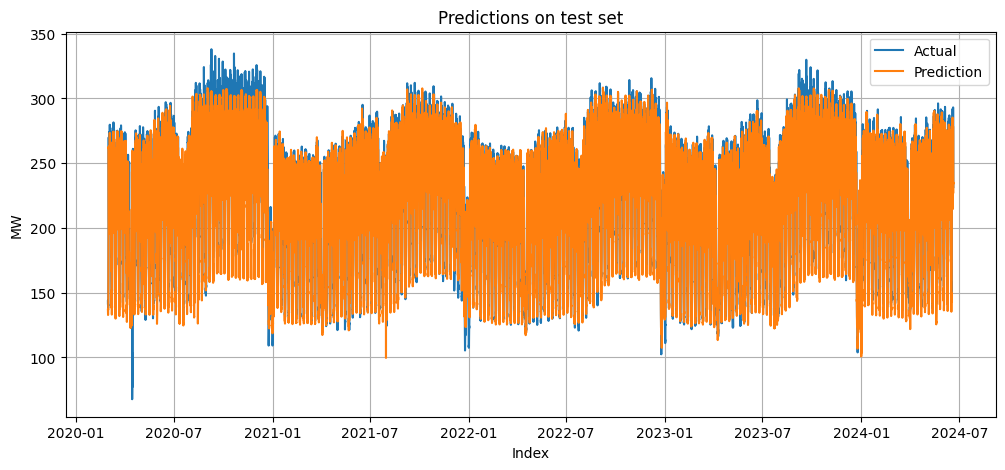

In [26]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 8.13161599193522
Mean Squared Error (MSE): 150.03918436640134
Root Mean Squared Error (RMSE): 12.24904830451743
R-squared (R²): 0.9364177260900738
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.638230
1    day_of_week    0.208216
4           year    0.067493
0           hour    0.021729
9        holiday    0.015447
5    day_of_year    0.009389
22        lag_36    0.004025
34        lag_48    0.003745
33        lag_47    0.002415
11        lag_25    0.002280
23        lag_37    0.002050
7   week_of_year    0.002035
6   day_of_month    0.001677
21        lag_35    0.001629
12        lag_26    0.001534
24        lag_38    0.001511
20        lag_34    0.001178
32        lag_46    0.001122
19        lag_33    0.001120
18        lag_32    0.001075
16        lag_30    0.001065
13        lag_27    0.001051
25        lag_39    0.000934
31        lag_45    0.000915
30        lag_44    0.000865
14        lag_28    0.0

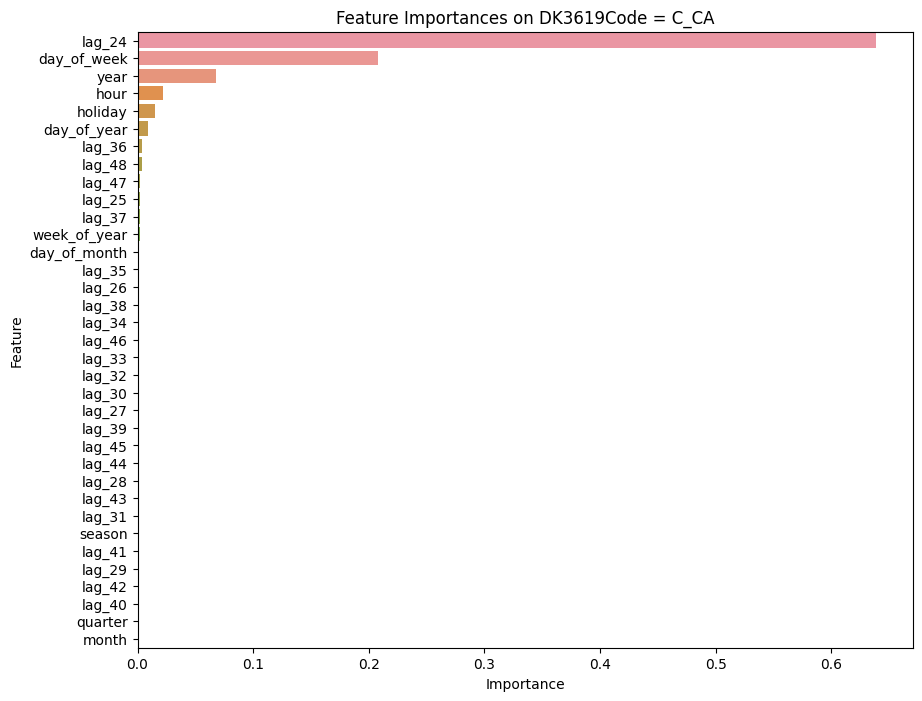

In [27]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = C_CA')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = C_CC

In [28]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'C_CC']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/2410631811.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/2410631811.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/2410631811.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208770 to 1538
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208770 2020-03-01 00:00:00  29.288576   27.445428       3.397196
1208738 2020-03-01 01:00:00  28.501308   27.065981       2.060163
1208706 2020-03-01 02:00:00  27.478615   27.019241       0.211025
1208674 2020-03-01 03:00:00  28.208351   27.044332       1.354941
1208642 2020-03-01 04:00:00  28.404886   26.778158       2.646243


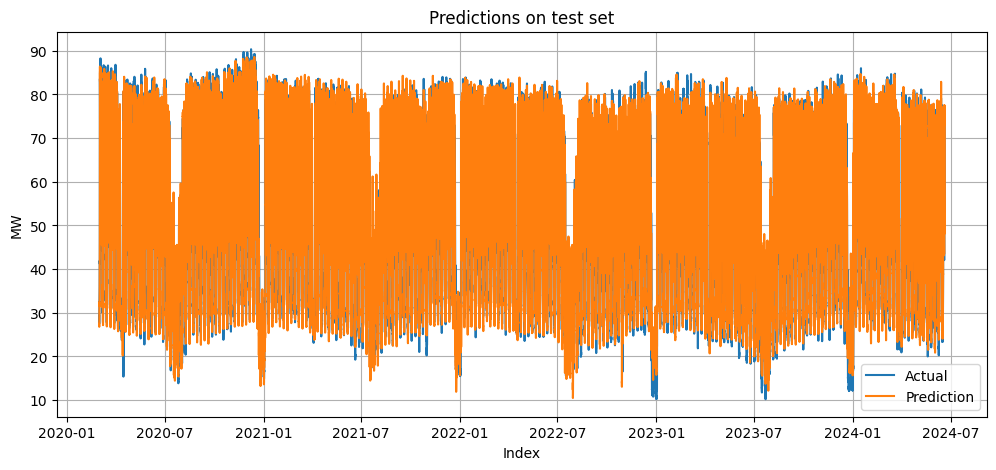

In [29]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 2.4814938806183897
Mean Squared Error (MSE): 15.311493513771142
Root Mean Squared Error (RMSE): 3.9129903544183624
R-squared (R²): 0.9551048131360023
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.461366
1    day_of_week    0.364184
0           hour    0.043686
4           year    0.041222
9        holiday    0.027976
34        lag_48    0.008253
5    day_of_year    0.008116
11        lag_25    0.004725
7   week_of_year    0.003632
33        lag_47    0.002756
8         season    0.002648
12        lag_26    0.002620
6   day_of_month    0.002436
13        lag_27    0.001928
17        lag_31    0.001872
15        lag_29    0.001799
26        lag_40    0.001552
25        lag_39    0.001475
18        lag_32    0.001399
16        lag_30    0.001345
19        lag_33    0.001290
20        lag_34    0.001199
32        lag_46    0.001133
27        lag_41    0.001113
14        lag_28    0.001078
3          month    

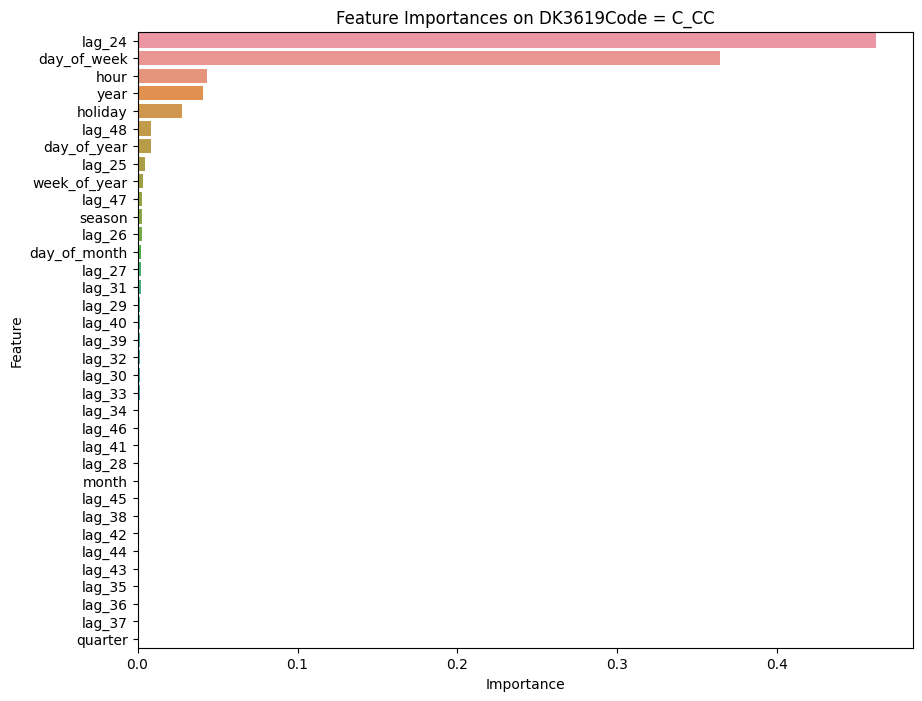

In [30]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = C_CC')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = C_CE_CF_CD

In [31]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'C_CE_CF_CD']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/3880176453.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/3880176453.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/3880176453.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208771 to 1539
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK      actual  prediction  squared_error
1208771 2020-03-01 00:00:00  159.403961  159.661177       0.066160
1208739 2020-03-01 01:00:00  160.408539  159.474607       0.872230
1208707 2020-03-01 02:00:00  161.735992  159.267583       6.093042
1208675 2020-03-01 03:00:00  160.485901  158.987202       2.246097
1208643 2020-03-01 04:00:00  161.297531  159.162109       4.560026


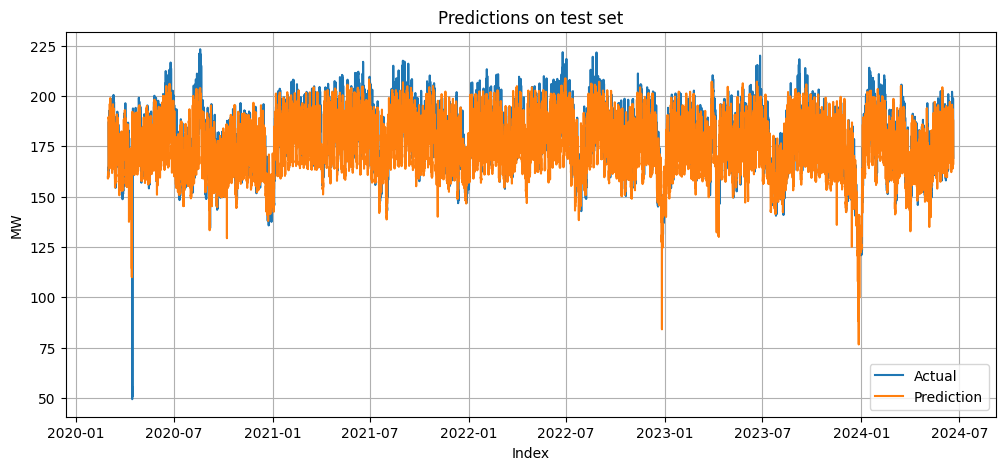

In [32]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 6.622821803203545
Mean Squared Error (MSE): 78.43417324498742
Root Mean Squared Error (RMSE): 8.856306975539377
R-squared (R²): 0.6278312866421374
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.866990
1    day_of_week    0.052481
0           hour    0.011131
4           year    0.005756
5    day_of_year    0.005219
23        lag_37    0.005219
6   day_of_month    0.005005
22        lag_36    0.004119
34        lag_48    0.002949
9        holiday    0.002492
11        lag_25    0.002471
7   week_of_year    0.002391
20        lag_34    0.002346
21        lag_35    0.002253
24        lag_38    0.002247
33        lag_47    0.002180
19        lag_33    0.001840
12        lag_26    0.001730
16        lag_30    0.001635
32        lag_46    0.001625
18        lag_32    0.001547
17        lag_31    0.001547
15        lag_29    0.001507
25        lag_39    0.001455
31        lag_45    0.001391
26        lag_40    0.0

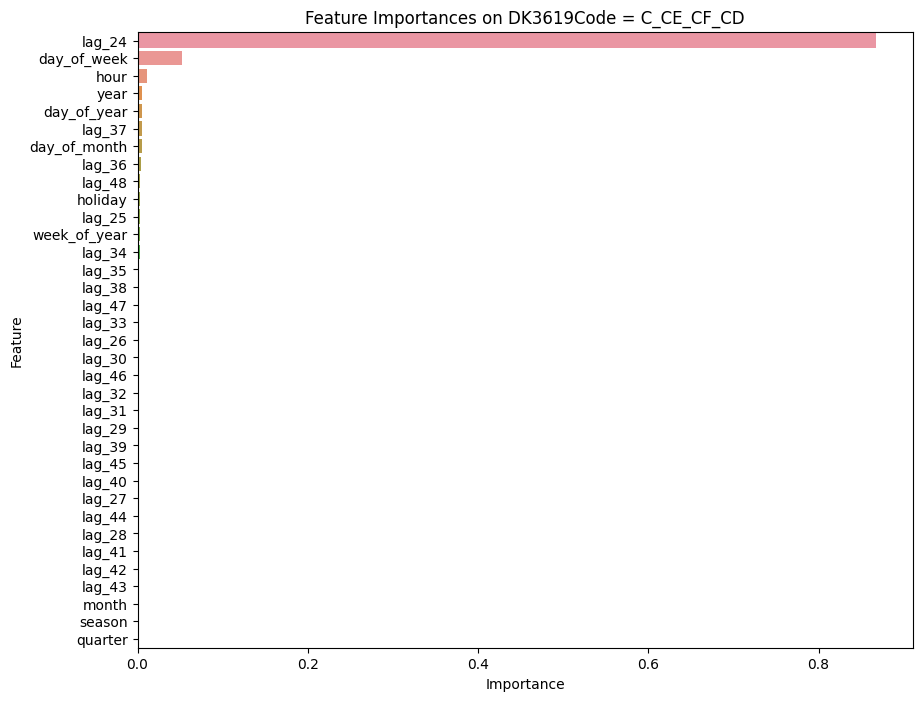

In [33]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = C_CE_CF_CD')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = C_CG

In [34]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'C_CG']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/1620331136.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1620331136.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1620331136.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208772 to 1540
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK      actual  prediction  squared_error
1208772 2020-03-01 00:00:00  107.999023   98.034303      99.295646
1208740 2020-03-01 01:00:00  105.428772   97.856579      57.338114
1208708 2020-03-01 02:00:00  105.835945   97.225292      74.143342
1208676 2020-03-01 03:00:00  105.697296   98.221221      55.891700
1208644 2020-03-01 04:00:00  106.111671   97.129276      80.683411


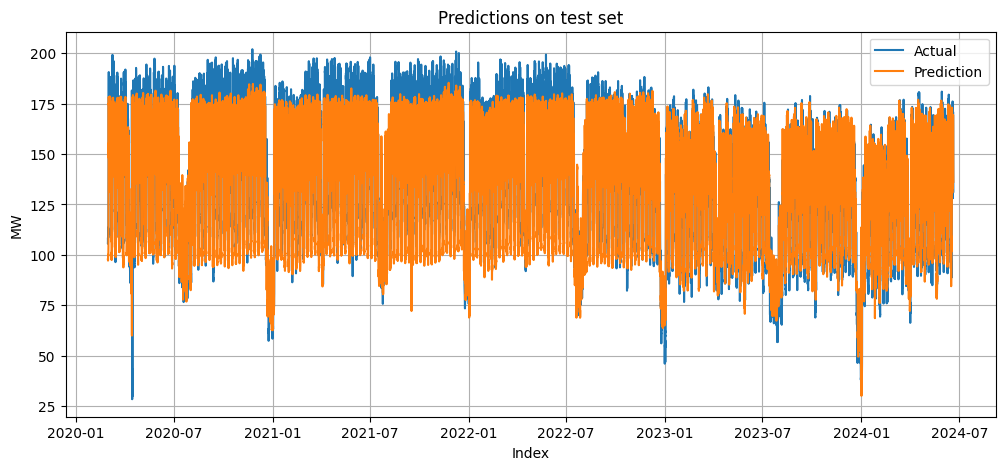

In [35]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 8.279988418309431
Mean Squared Error (MSE): 123.85569871352074
Root Mean Squared Error (RMSE): 11.129047520498812
R-squared (R²): 0.8737698531125093
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.798768
1    day_of_week    0.128002
4           year    0.017120
0           hour    0.013299
9        holiday    0.007471
5    day_of_year    0.004613
34        lag_48    0.004195
6   day_of_month    0.002069
7   week_of_year    0.001810
33        lag_47    0.001508
11        lag_25    0.001326
16        lag_30    0.001296
8         season    0.001264
32        lag_46    0.001116
24        lag_38    0.001100
31        lag_45    0.001087
22        lag_36    0.000944
21        lag_35    0.000937
23        lag_37    0.000906
17        lag_31    0.000890
12        lag_26    0.000864
30        lag_44    0.000831
25        lag_39    0.000830
20        lag_34    0.000808
18        lag_32    0.000767
13        lag_27    0

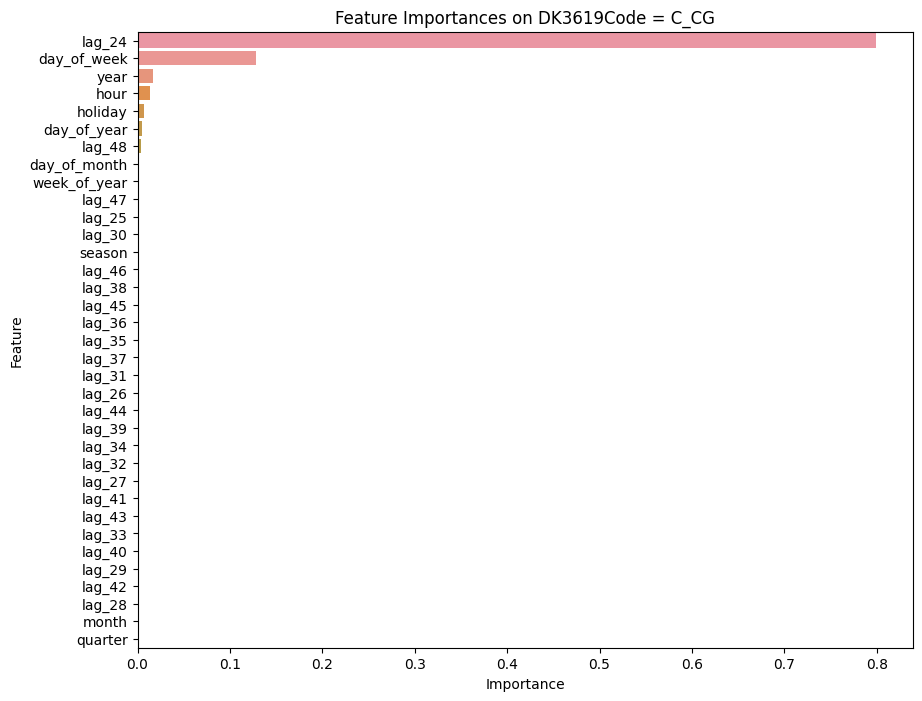

In [36]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = C_CG')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = C_CH

In [37]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'C_CH']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/1488599782.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1488599782.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1488599782.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208773 to 1541
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208773 2020-03-01 00:00:00  50.891270   44.360840      42.646520
1208741 2020-03-01 01:00:00  50.291618   44.314213      35.729376
1208709 2020-03-01 02:00:00  47.301517   43.366835      15.481723
1208677 2020-03-01 03:00:00  49.657745   43.998244      32.029947
1208645 2020-03-01 04:00:00  49.547253   43.634936      34.955490


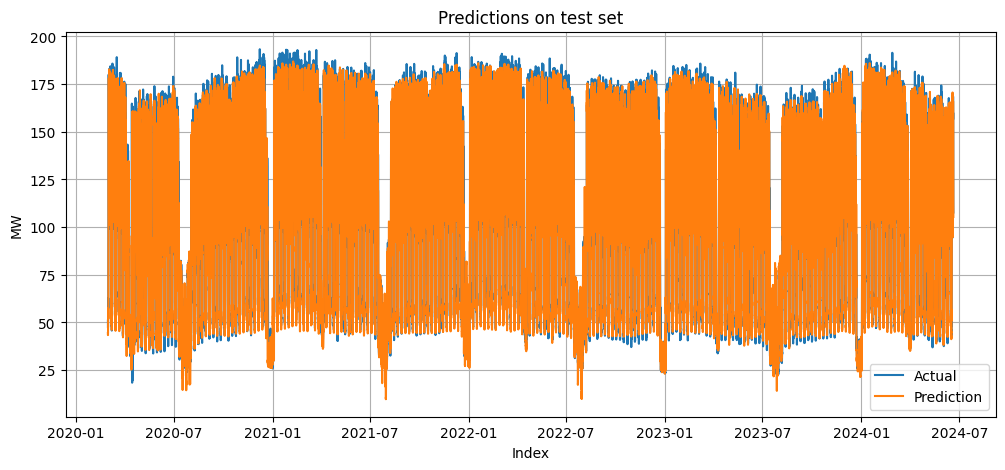

In [38]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 4.816776012398548
Mean Squared Error (MSE): 62.982275533536985
Root Mean Squared Error (RMSE): 7.936137318213249
R-squared (R²): 0.9690791072391206
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.569382
1    day_of_week    0.280589
4           year    0.044480
0           hour    0.021557
9        holiday    0.019398
11        lag_25    0.011071
34        lag_48    0.007117
8         season    0.003898
23        lag_37    0.003115
22        lag_36    0.002900
12        lag_26    0.002606
5    day_of_year    0.002179
25        lag_39    0.002130
24        lag_38    0.001974
20        lag_34    0.001941
6   day_of_month    0.001913
27        lag_41    0.001892
32        lag_46    0.001818
33        lag_47    0.001753
28        lag_42    0.001723
19        lag_33    0.001544
21        lag_35    0.001366
16        lag_30    0.001319
31        lag_45    0.001319
29        lag_43    0.001299
17        lag_31    0.

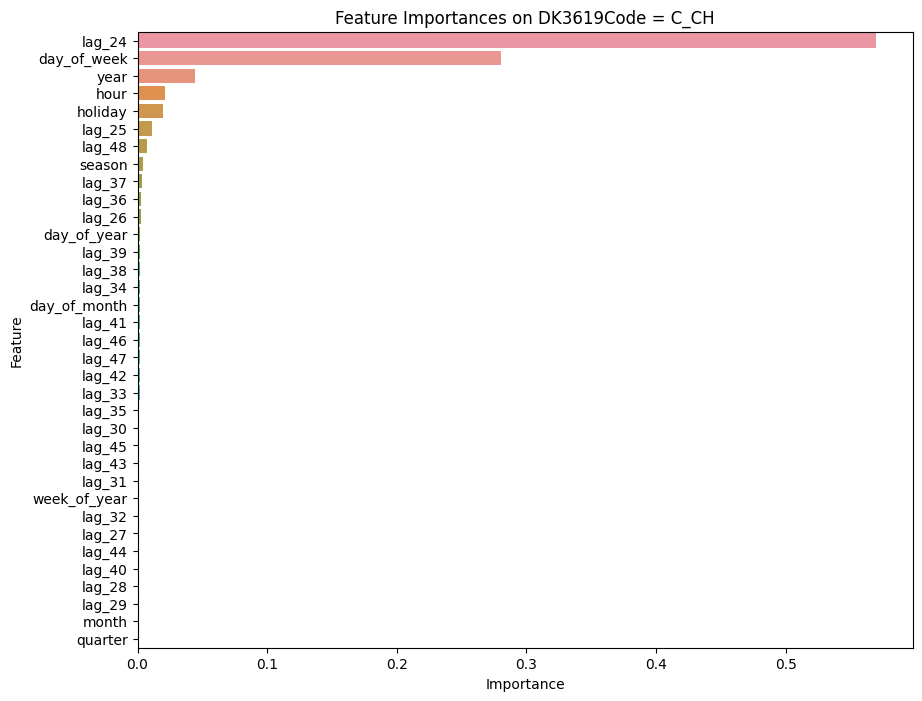

In [39]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = C_CH')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = C_CI

In [40]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'C_CI']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/1513581672.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1513581672.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1513581672.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208774 to 1542
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK    actual  prediction  squared_error
1208774 2020-03-01 00:00:00  5.748633    5.723577       0.000628
1208742 2020-03-01 01:00:00  5.742087    5.704045       0.001447
1208710 2020-03-01 02:00:00  5.739662    5.695054       0.001990
1208678 2020-03-01 03:00:00  5.832830    5.695723       0.018798
1208646 2020-03-01 04:00:00  5.877824    5.693842       0.033849


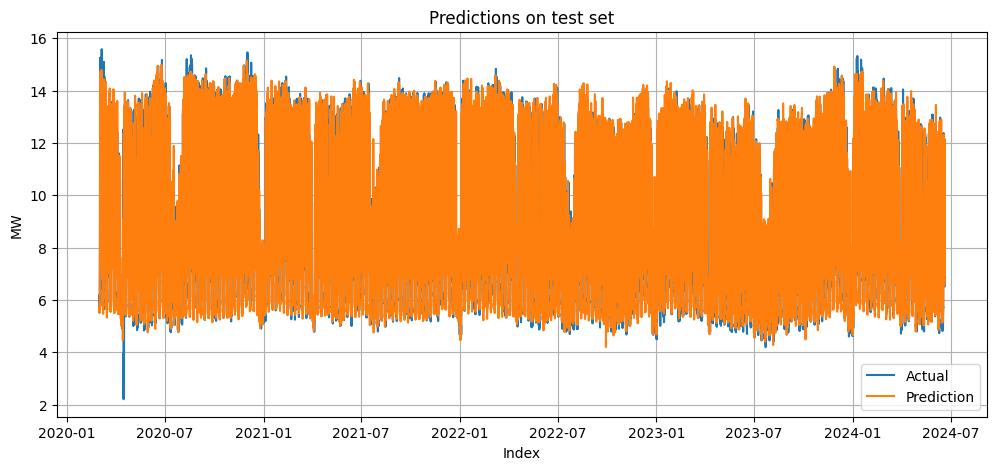

In [41]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 0.36945245869774956
Mean Squared Error (MSE): 0.33887256145245054
Root Mean Squared Error (RMSE): 0.5821276161224879
R-squared (R²): 0.9541966586587333
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.623955
1    day_of_week    0.223457
0           hour    0.068586
4           year    0.027662
9        holiday    0.016085
34        lag_48    0.005005
11        lag_25    0.004692
5    day_of_year    0.004233
6   day_of_month    0.001832
12        lag_26    0.001728
16        lag_30    0.001485
23        lag_37    0.001443
24        lag_38    0.001422
33        lag_47    0.001381
7   week_of_year    0.001292
17        lag_31    0.001188
18        lag_32    0.001127
22        lag_36    0.001075
21        lag_35    0.001064
20        lag_34    0.001044
13        lag_27    0.001004
25        lag_39    0.000946
19        lag_33    0.000922
32        lag_46    0.000866
15        lag_29    0.000846
26        lag_40  

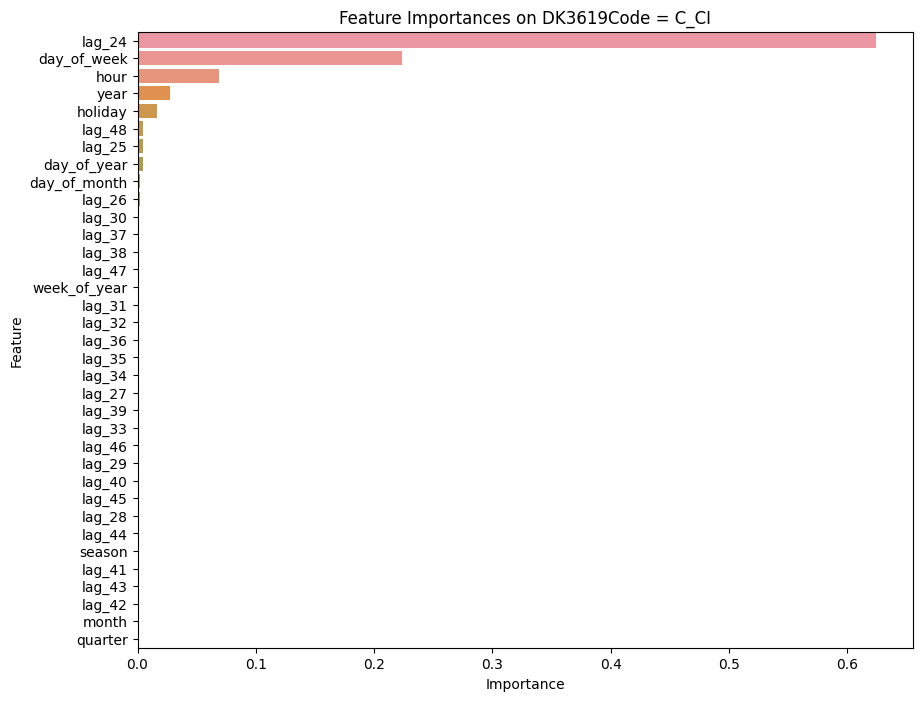

In [42]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = C_CI')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = C_CJ

In [43]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'C_CJ']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/2475261562.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/2475261562.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/2475261562.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208775 to 1543
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK    actual  prediction  squared_error
1208775 2020-03-01 00:00:00  6.310677    6.723693       0.170582
1208743 2020-03-01 01:00:00  6.334340    6.741303       0.165619
1208711 2020-03-01 02:00:00  6.319539    6.881181       0.315442
1208679 2020-03-01 03:00:00  6.398737    6.816687       0.174682
1208647 2020-03-01 04:00:00  6.269356    6.925545       0.430583


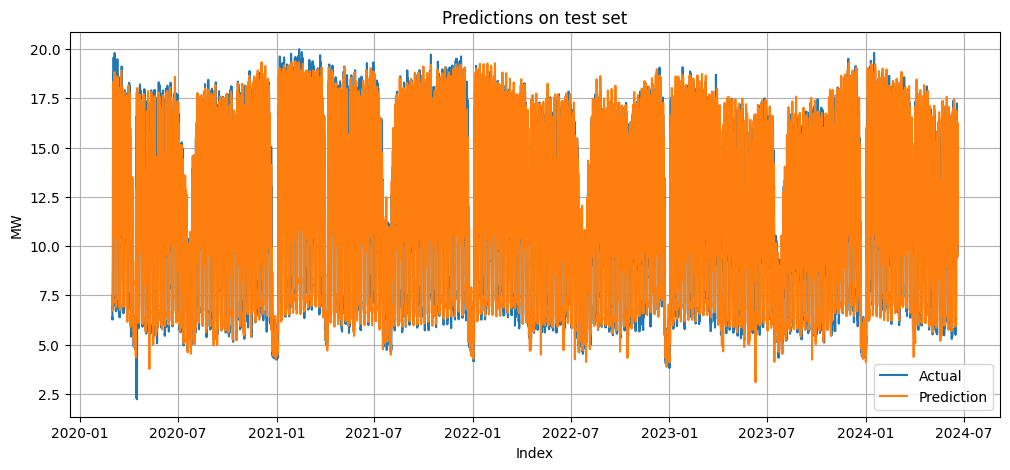

In [44]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 0.47984846596363345
Mean Squared Error (MSE): 0.5803420761890952
Root Mean Squared Error (RMSE): 0.7618018615027763
R-squared (R²): 0.9635936728355947
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.445834
1    day_of_week    0.389604
0           hour    0.051215
9        holiday    0.024445
4           year    0.020954
34        lag_48    0.012536
5    day_of_year    0.006921
11        lag_25    0.004706
33        lag_47    0.003804
16        lag_30    0.003636
6   day_of_month    0.002756
7   week_of_year    0.002539
8         season    0.002462
17        lag_31    0.002081
12        lag_26    0.002029
32        lag_46    0.001879
20        lag_34    0.001748
18        lag_32    0.001734
13        lag_27    0.001509
19        lag_33    0.001422
21        lag_35    0.001367
15        lag_29    0.001340
22        lag_36    0.001331
27        lag_41    0.001281
24        lag_38    0.001191
26        lag_40   

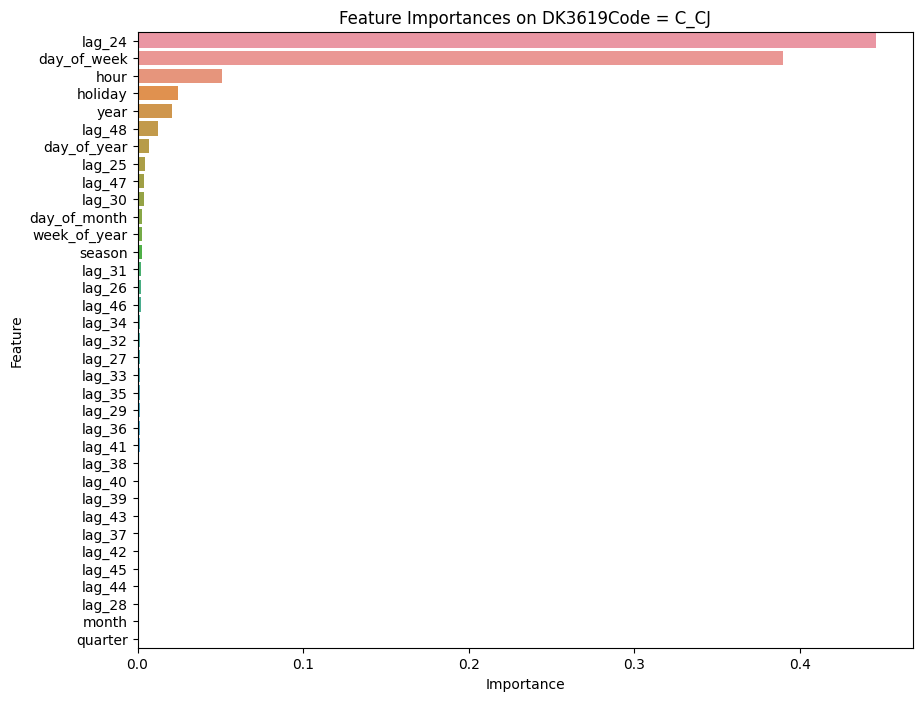

In [45]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = C_CJ')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = C_CK

In [46]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'C_CK']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/4113480152.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/4113480152.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/4113480152.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208776 to 1544
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208776 2020-03-01 00:00:00  28.786894   27.587465       1.438630
1208744 2020-03-01 01:00:00  28.765636   27.507972       1.581719
1208712 2020-03-01 02:00:00  28.696625   27.466752       1.512589
1208680 2020-03-01 03:00:00  28.817266   27.509063       1.711396
1208648 2020-03-01 04:00:00  29.040377   28.157449       0.779562


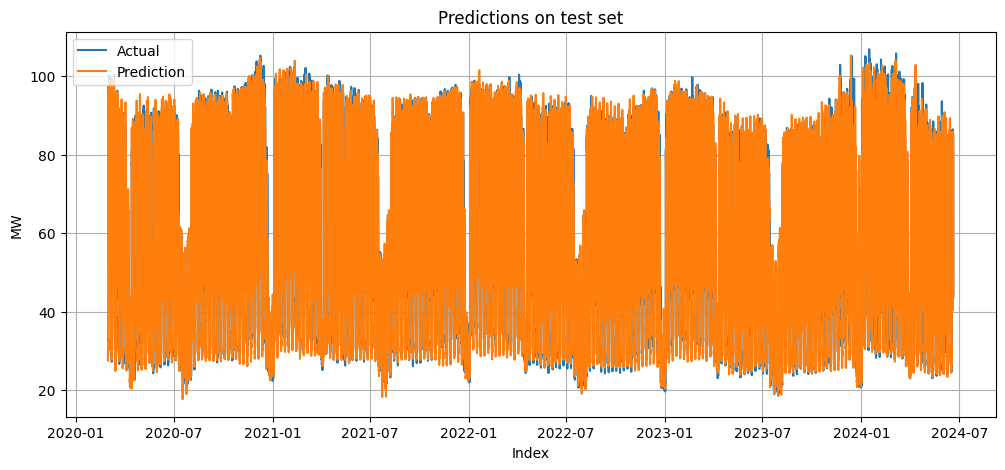

In [47]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 2.3807348816041563
Mean Squared Error (MSE): 17.55989473613857
Root Mean Squared Error (RMSE): 4.190452808007575
R-squared (R²): 0.9636975096149808
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.648064
1    day_of_week    0.255406
0           hour    0.024931
9        holiday    0.015611
4           year    0.012590
34        lag_48    0.006033
33        lag_47    0.002529
24        lag_38    0.002426
21        lag_35    0.002409
5    day_of_year    0.002240
22        lag_36    0.002005
32        lag_46    0.001963
11        lag_25    0.001862
20        lag_34    0.001804
23        lag_37    0.001793
25        lag_39    0.001738
31        lag_45    0.001434
26        lag_40    0.001262
18        lag_32    0.001259
16        lag_30    0.001217
19        lag_33    0.001199
17        lag_31    0.001177
6   day_of_month    0.001170
8         season    0.001161
7   week_of_year    0.001116
12        lag_26    0.

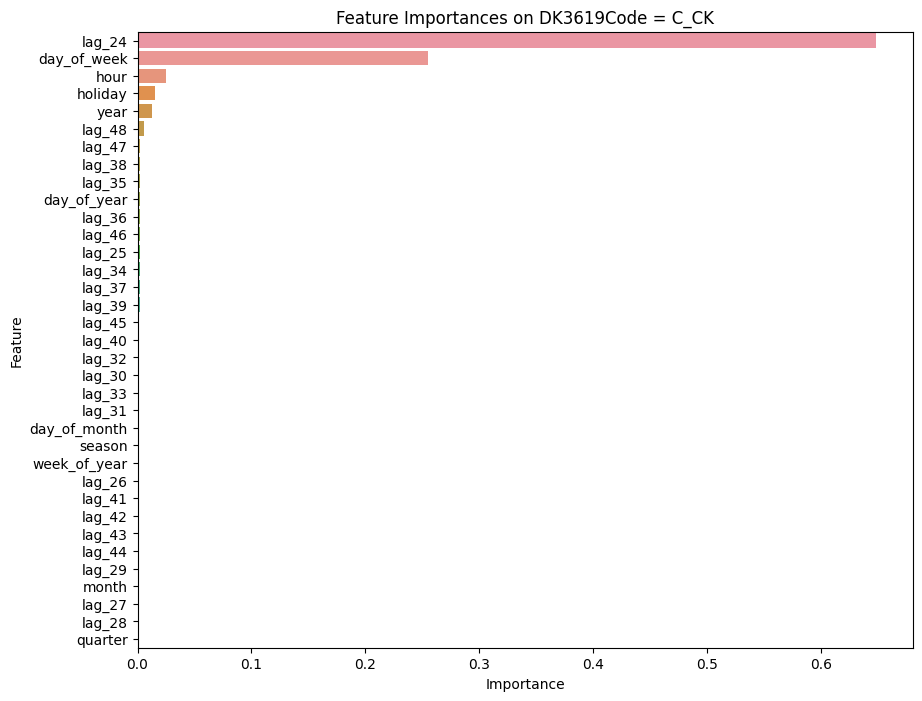

In [48]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = C_CK')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = C_CL

In [49]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'C_CL']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/605455027.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/605455027.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/605455027.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208777 to 1545
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK    actual  prediction  squared_error
1208777 2020-03-01 00:00:00  4.755108    4.384200       0.137573
1208745 2020-03-01 01:00:00  4.855038    4.234732       0.384780
1208713 2020-03-01 02:00:00  4.855033    4.224165       0.397994
1208681 2020-03-01 03:00:00  4.752541    4.283350       0.220140
1208649 2020-03-01 04:00:00  4.494383    4.491483       0.000008


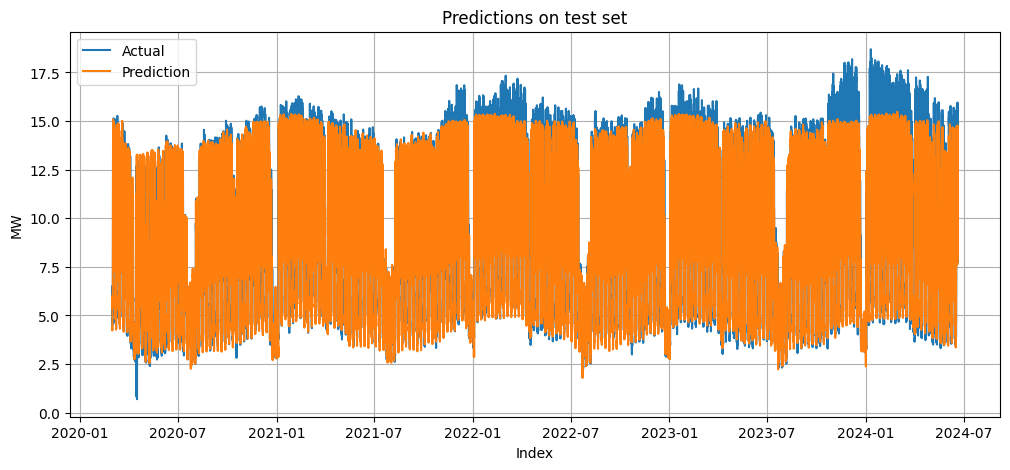

In [50]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 0.5487831845020805
Mean Squared Error (MSE): 0.6927204086457649
Root Mean Squared Error (RMSE): 0.8322982690392698
R-squared (R²): 0.9504495262763405
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.553155
1    day_of_week    0.309199
0           hour    0.030735
4           year    0.029892
9        holiday    0.019998
34        lag_48    0.009994
5    day_of_year    0.004290
33        lag_47    0.003471
7   week_of_year    0.003012
8         season    0.002880
6   day_of_month    0.002425
11        lag_25    0.002313
22        lag_36    0.002094
12        lag_26    0.001688
18        lag_32    0.001667
21        lag_35    0.001575
25        lag_39    0.001505
32        lag_46    0.001473
26        lag_40    0.001456
17        lag_31    0.001382
24        lag_38    0.001367
19        lag_33    0.001333
16        lag_30    0.001332
23        lag_37    0.001292
13        lag_27    0.001269
20        lag_34    

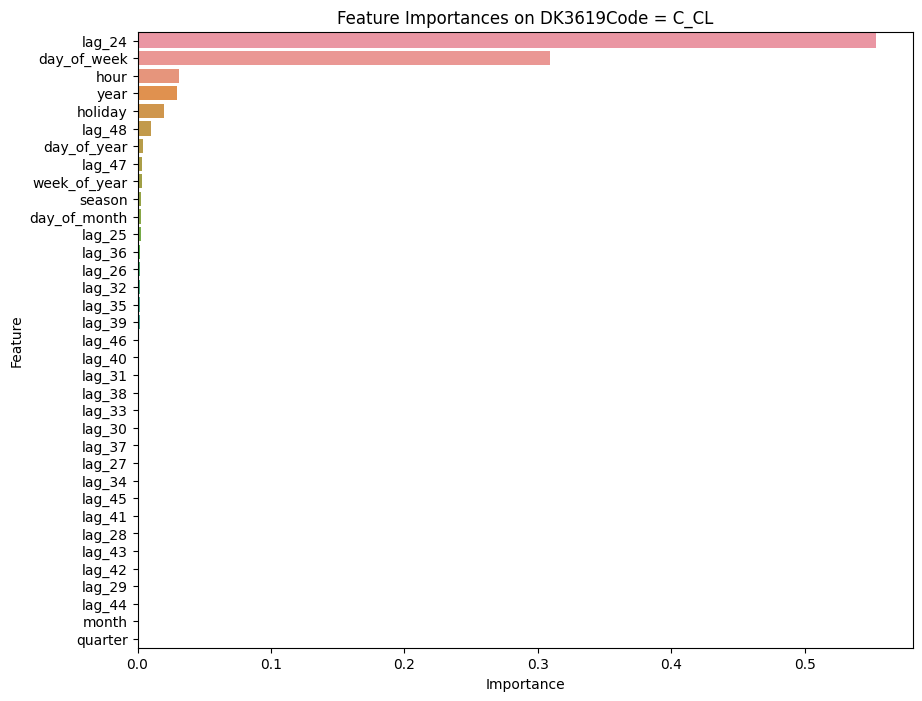

In [51]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = C_CL')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = C_CM_CB

In [52]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'C_CM_CB']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/2451605472.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/2451605472.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/2451605472.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208778 to 1546
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208778 2020-03-01 00:00:00  28.680754   28.302181       0.143317
1208746 2020-03-01 01:00:00  28.621174   28.279378       0.116824
1208714 2020-03-01 02:00:00  28.709749   28.257055       0.204932
1208682 2020-03-01 03:00:00  28.501591   28.218795       0.079973
1208650 2020-03-01 04:00:00  28.693541   28.398694       0.086934


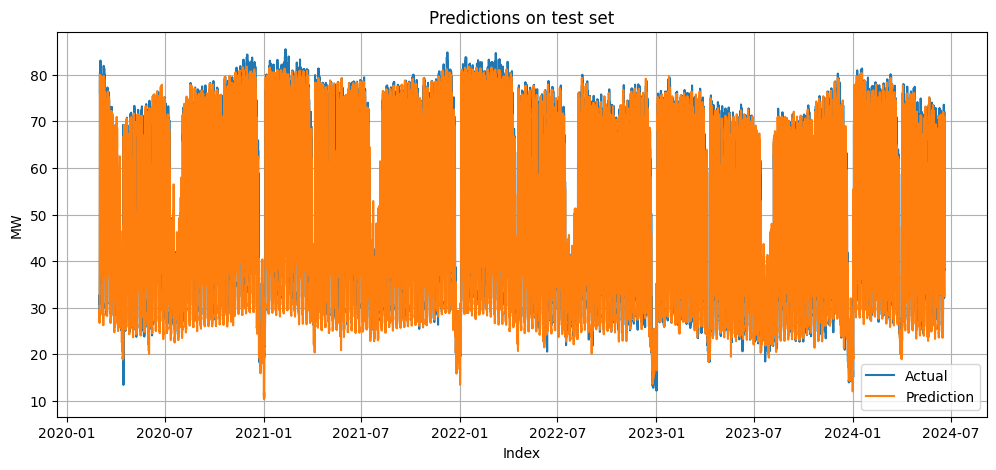

In [53]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 1.902973277581838
Mean Squared Error (MSE): 9.492193026786317
Root Mean Squared Error (RMSE): 3.08094028289844
R-squared (R²): 0.9661105007965953
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.651419
1    day_of_week    0.241775
0           hour    0.035112
9        holiday    0.014896
4           year    0.012752
34        lag_48    0.004912
5    day_of_year    0.003740
26        lag_40    0.002723
31        lag_45    0.002533
24        lag_38    0.002469
25        lag_39    0.002034
7   week_of_year    0.001992
23        lag_37    0.001591
6   day_of_month    0.001570
11        lag_25    0.001537
33        lag_47    0.001459
27        lag_41    0.001397
17        lag_31    0.001302
16        lag_30    0.001295
30        lag_44    0.001147
8         season    0.001140
18        lag_32    0.001137
19        lag_33    0.001013
12        lag_26    0.001004
22        lag_36    0.000995
32        lag_46    0.00

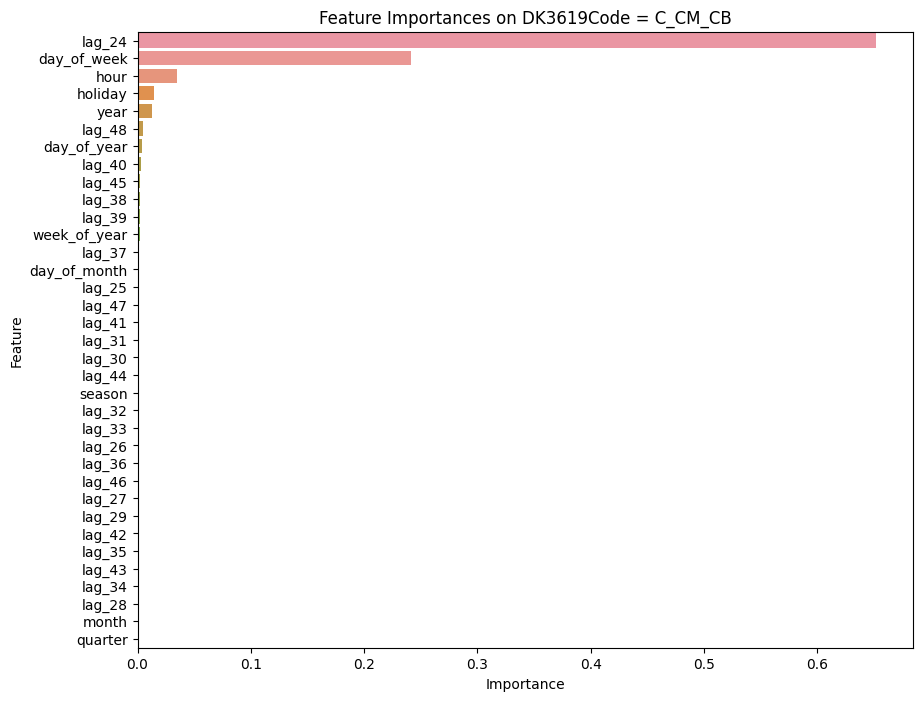

In [54]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = C_CM_CB')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = D_D

In [55]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'D_D']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/3875763785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/3875763785.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/3875763785.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208779 to 1547
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK      actual  prediction  squared_error
1208779 2020-03-01 00:00:00  189.297638  267.458470    6109.115646
1208747 2020-03-01 01:00:00  148.556870  249.023219   10093.487187
1208715 2020-03-01 02:00:00  147.981201  238.956200    8276.450529
1208683 2020-03-01 03:00:00  146.827682  209.305244    3903.445776
1208651 2020-03-01 04:00:00  153.437012  202.897879    2446.377373


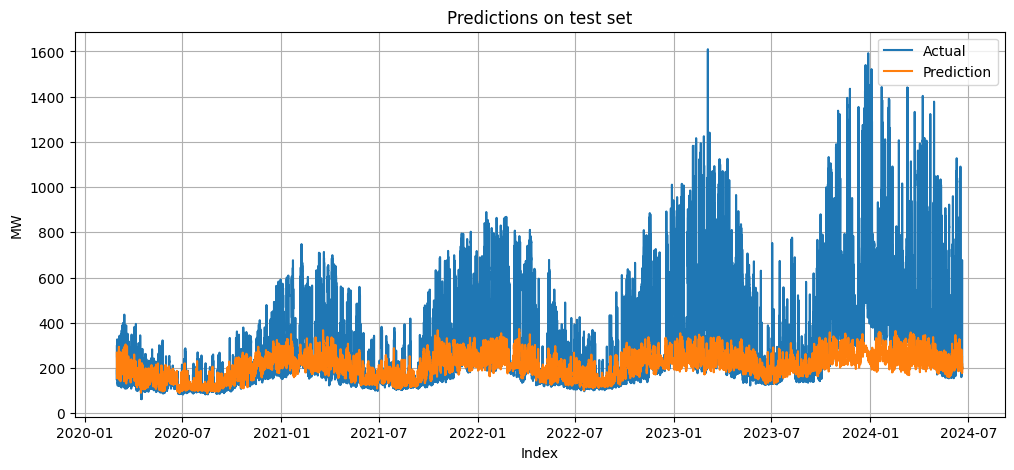

In [56]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 125.73010086262173
Mean Squared Error (MSE): 46891.889314411914
Root Mean Squared Error (RMSE): 216.54535163427525
R-squared (R²): 0.01875066659733604
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.520982
5    day_of_year    0.037923
34        lag_48    0.037357
6   day_of_month    0.025752
4           year    0.024020
16        lag_30    0.021950
13        lag_27    0.018299
11        lag_25    0.017136
18        lag_32    0.015554
21        lag_35    0.014883
12        lag_26    0.014815
33        lag_47    0.014555
1    day_of_week    0.014362
0           hour    0.014360
22        lag_36    0.014337
15        lag_29    0.013908
17        lag_31    0.013728
31        lag_45    0.012839
32        lag_46    0.012785
7   week_of_year    0.012747
19        lag_33    0.012732
14        lag_28    0.011821
30        lag_44    0.011205
20        lag_34    0.011119
23        lag_37    0.011089
29        lag_43   

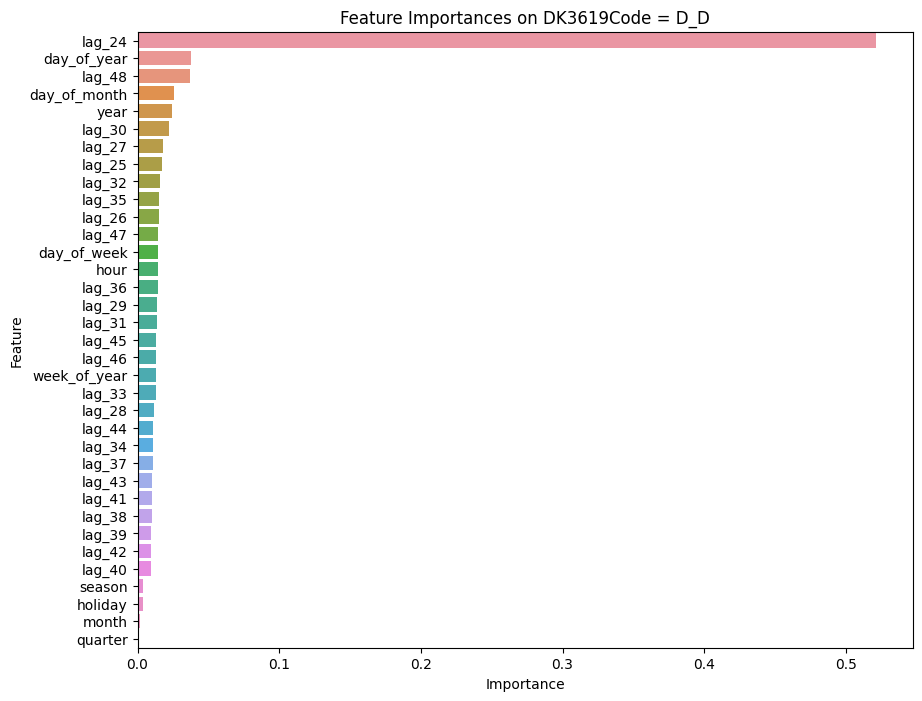

In [57]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = D_D')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = E_E

In [58]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'E_E']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_25/1532566745.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1532566745.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1532566745.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208780 to 1548
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208780 2020-03-01 00:00:00  89.442284   73.411250     256.994050
1208748 2020-03-01 01:00:00  85.110779   75.771589      87.220468
1208716 2020-03-01 02:00:00  83.196869   72.410728     116.340830
1208684 2020-03-01 03:00:00  81.311684   69.963256     128.786807
1208652 2020-03-01 04:00:00  80.021591   69.543572     109.788883


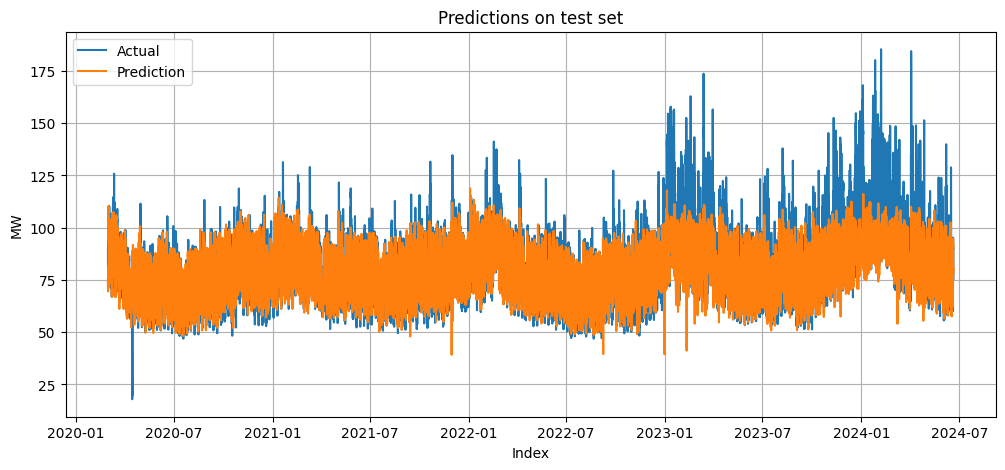

In [59]:
y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

Mean Absolute Error (MAE): 6.4684334201487
Mean Squared Error (MSE): 112.83457292401013
Root Mean Squared Error (RMSE): 10.622361927745173
R-squared (R²): 0.6226092542713235
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.796427
1    day_of_week    0.040902
4           year    0.023478
34        lag_48    0.014097
0           hour    0.011563
5    day_of_year    0.008388
6   day_of_month    0.006317
11        lag_25    0.005421
31        lag_45    0.004704
18        lag_32    0.004553
33        lag_47    0.004354
24        lag_38    0.004301
7   week_of_year    0.004217
25        lag_39    0.004193
15        lag_29    0.004069
32        lag_46    0.004062
13        lag_27    0.004041
17        lag_31    0.003994
26        lag_40    0.003932
19        lag_33    0.003931
12        lag_26    0.003797
16        lag_30    0.003783
30        lag_44    0.003688
20        lag_34    0.003475
27        lag_41    0.003434
14        lag_28    0.0

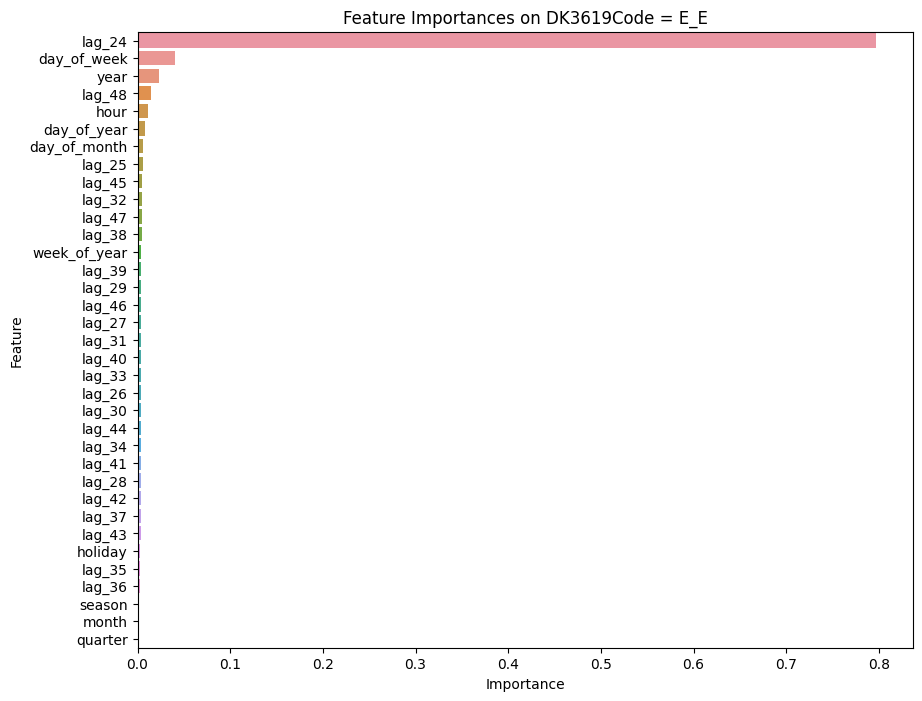

In [60]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = E_E')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = F_F

/tmp/ipykernel_25/1581956004.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1581956004.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1581956004.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208781 to 1549
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208781 2020-03-01 00:00:00  41.227554   39.241117       3.945930
1208749 2020-03-01 01:00:00  40.870144   39.050348       3.311657
1208717 2020-03-01 02:00:00  40.839394   38.758403       4.330525
1208685 2020-03-01 03:00:00  40.650856   36.666121      15.878115
1208653 2020-03-01 04:00:00  40.933327   35.901091      25.323404


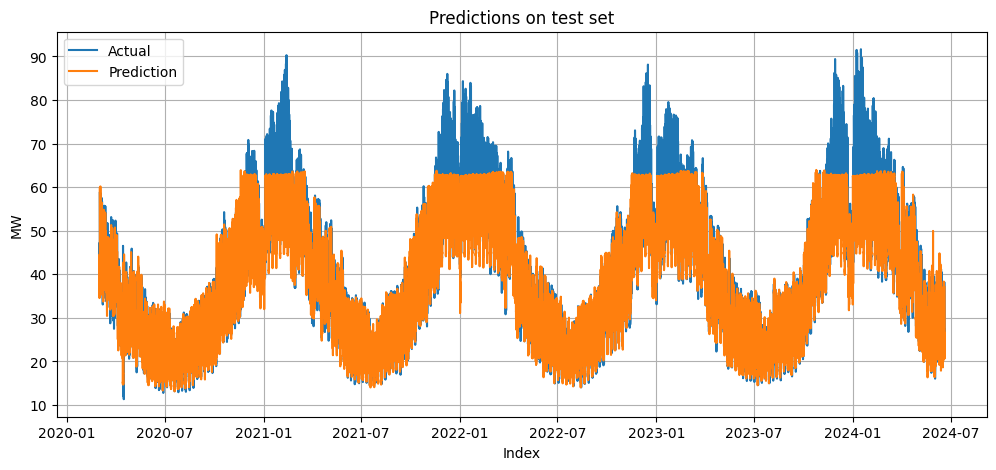

Mean Absolute Error (MAE): 2.4992987477602235
Mean Squared Error (MSE): 20.63166701632848
Root Mean Squared Error (RMSE): 4.542209486178337
R-squared (R²): 0.9085449226145169
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.920743
1    day_of_week    0.033882
23        lag_37    0.005012
0           hour    0.003996
4           year    0.003340
24        lag_38    0.003337
21        lag_35    0.003193
22        lag_36    0.002681
20        lag_34    0.002616
34        lag_48    0.002467
9        holiday    0.001915
17        lag_31    0.001820
11        lag_25    0.001555
25        lag_39    0.001260
5    day_of_year    0.001188
16        lag_30    0.001145
19        lag_33    0.000851
6   day_of_month    0.000800
33        lag_47    0.000744
15        lag_29    0.000712
26        lag_40    0.000698
12        lag_26    0.000616
13        lag_27    0.000585
27        lag_41    0.000566
18        lag_32    0.000559
14        lag_28    0.

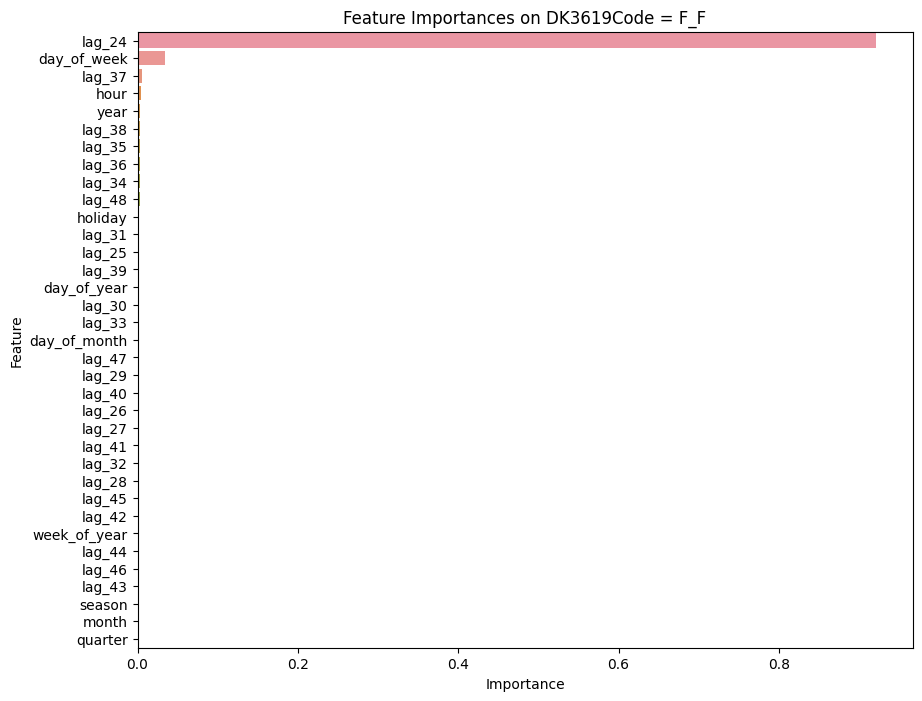

In [61]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'F_F']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()



# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = F_F')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = G_G

/tmp/ipykernel_25/2750029140.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/2750029140.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/2750029140.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208782 to 1550
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK      actual  prediction  squared_error
1208782 2020-03-01 00:00:00  179.750946  186.353614      43.595231
1208750 2020-03-01 01:00:00  180.152969  185.291218      26.401598
1208718 2020-03-01 02:00:00  182.146149  184.093455       3.792000
1208686 2020-03-01 03:00:00  184.398972  182.913939       2.205322
1208654 2020-03-01 04:00:00  190.055466  184.135400      35.047184


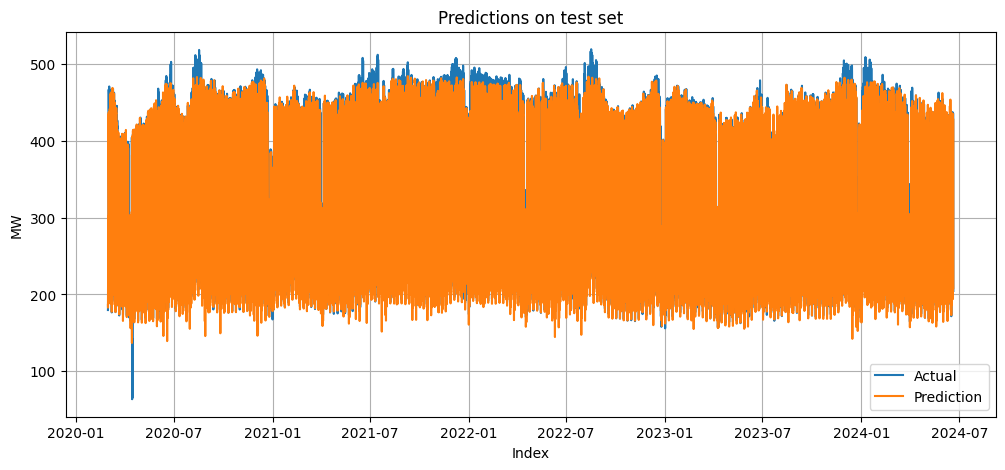

Mean Absolute Error (MAE): 9.72403632070506
Mean Squared Error (MSE): 357.51766952922327
Root Mean Squared Error (RMSE): 18.908137653645937
R-squared (R²): 0.9600826845083519
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.825019
1    day_of_week    0.108379
9        holiday    0.016528
34        lag_48    0.009352
33        lag_47    0.007218
4           year    0.004667
22        lag_36    0.003283
23        lag_37    0.002554
24        lag_38    0.002119
11        lag_25    0.002031
5    day_of_year    0.001727
27        lag_41    0.001395
25        lag_39    0.001261
14        lag_28    0.001221
13        lag_27    0.001165
12        lag_26    0.001054
21        lag_35    0.000966
26        lag_40    0.000951
6   day_of_month    0.000874
32        lag_46    0.000847
20        lag_34    0.000763
15        lag_29    0.000682
0           hour    0.000661
19        lag_33    0.000615
7   week_of_year    0.000610
31        lag_45    0.

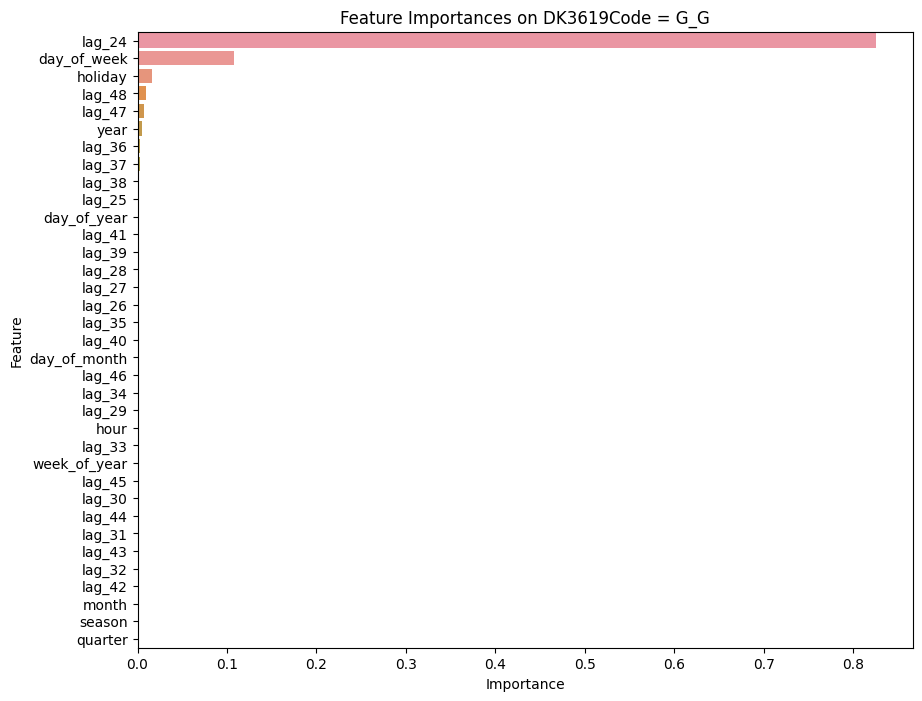

In [62]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'G_G']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()



# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = G_G')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = H_H

/tmp/ipykernel_25/2027951353.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/2027951353.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/2027951353.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208783 to 1551
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK      actual  prediction  squared_error
1208783 2020-03-01 00:00:00  105.556038  101.353643      17.660122
1208751 2020-03-01 01:00:00   96.877708   95.874995       1.005434
1208719 2020-03-01 02:00:00   92.208130   94.053571       3.405654
1208687 2020-03-01 03:00:00   91.569473   94.020958       6.009777
1208655 2020-03-01 04:00:00   91.437180   95.477506      16.324237


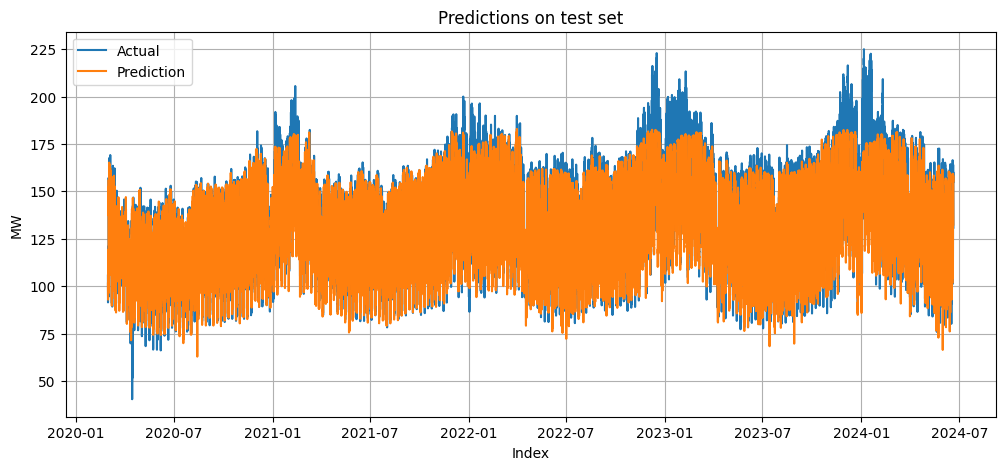

Mean Absolute Error (MAE): 7.5426513403048245
Mean Squared Error (MSE): 130.0528047394821
Root Mean Squared Error (RMSE): 11.404069656902402
R-squared (R²): 0.8114238176345686
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.644835
34        lag_48    0.147041
1    day_of_week    0.115172
4           year    0.012099
0           hour    0.008286
11        lag_25    0.006424
9        holiday    0.006266
28        lag_42    0.004803
5    day_of_year    0.003796
29        lag_43    0.003748
30        lag_44    0.003631
27        lag_41    0.003344
22        lag_36    0.003221
13        lag_27    0.003075
26        lag_40    0.002419
6   day_of_month    0.002418
12        lag_26    0.002366
25        lag_39    0.002180
14        lag_28    0.002150
16        lag_30    0.002044
20        lag_34    0.002020
21        lag_35    0.001891
15        lag_29    0.001823
24        lag_38    0.001770
23        lag_37    0.001761
33        lag_47    0

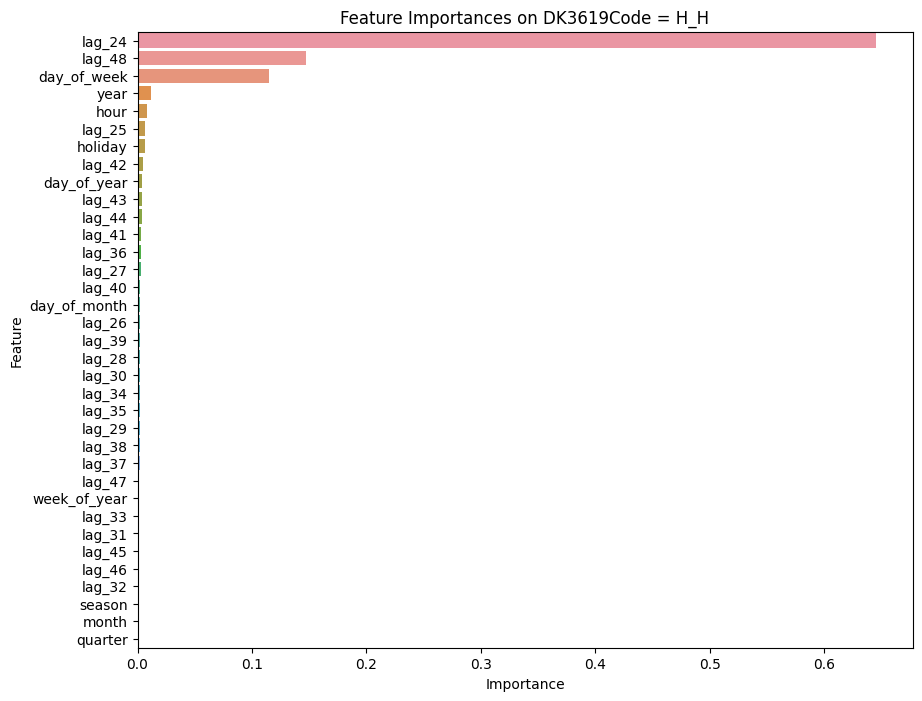

In [63]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'H_H']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()



# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = H_H')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = I_I

/tmp/ipykernel_25/839508667.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/839508667.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/839508667.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208784 to 1552
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208784 2020-03-01 00:00:00  62.554222   61.327227       1.505518
1208752 2020-03-01 01:00:00  57.873714   56.050826       3.322919
1208720 2020-03-01 02:00:00  54.501469   55.149743       0.420259
1208688 2020-03-01 03:00:00  51.805069   51.999837       0.037935
1208656 2020-03-01 04:00:00  50.130428   49.737278       0.154567


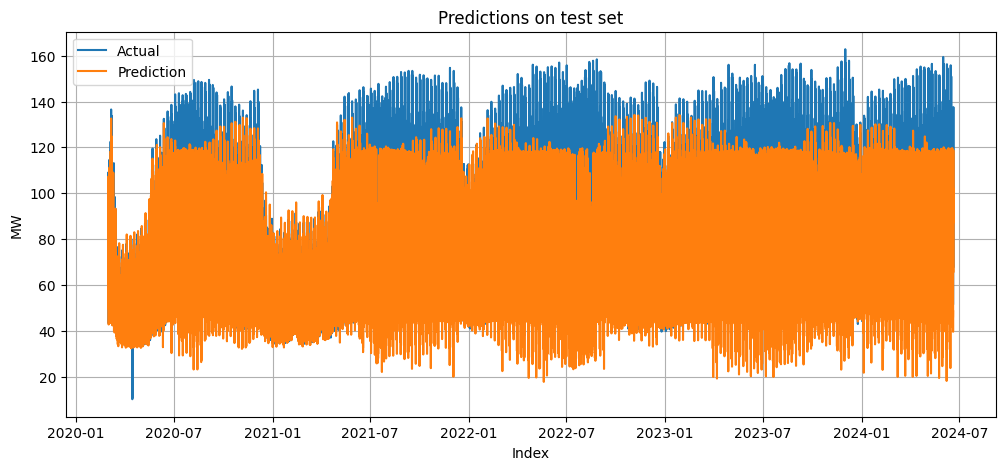

Mean Absolute Error (MAE): 9.102314250958733
Mean Squared Error (MSE): 270.77658322247225
Root Mean Squared Error (RMSE): 16.45529043263814
R-squared (R²): 0.6885694634523004
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.947246
34        lag_48    0.019257
1    day_of_week    0.014656
33        lag_47    0.001939
0           hour    0.001342
5    day_of_year    0.001126
28        lag_42    0.001074
31        lag_45    0.000949
27        lag_41    0.000878
11        lag_25    0.000832
29        lag_43    0.000769
32        lag_46    0.000749
20        lag_34    0.000687
21        lag_35    0.000561
30        lag_44    0.000513
13        lag_27    0.000494
12        lag_26    0.000493
22        lag_36    0.000491
14        lag_28    0.000488
7   week_of_year    0.000478
15        lag_29    0.000459
4           year    0.000456
18        lag_32    0.000425
6   day_of_month    0.000414
23        lag_37    0.000408
19        lag_33    0.

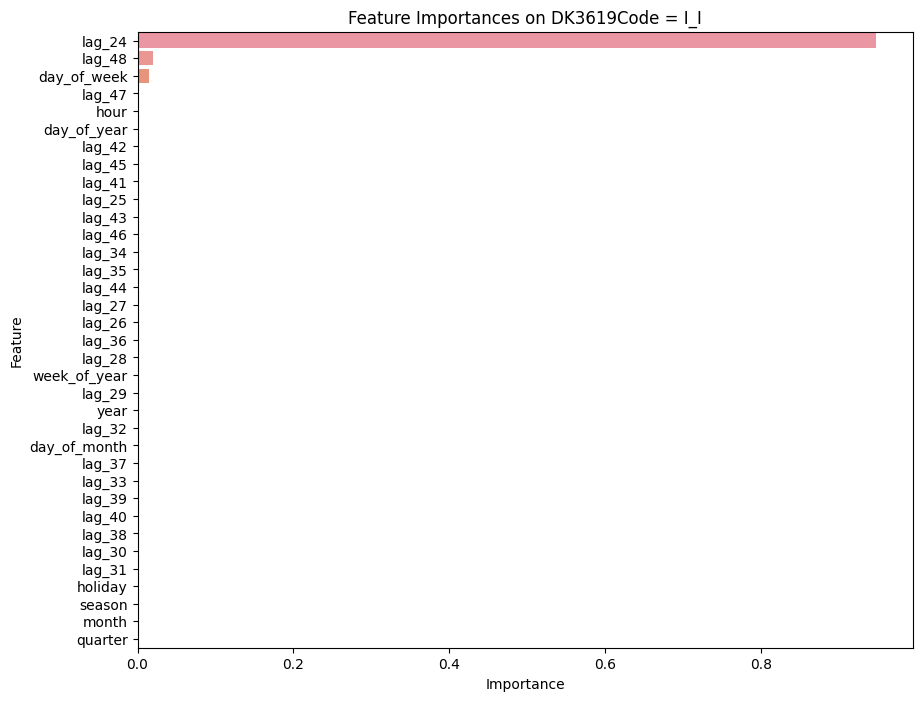

In [64]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'I_I']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = I_I')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = J_JA

/tmp/ipykernel_25/2305616551.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/2305616551.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/2305616551.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208785 to 1553
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK    actual  prediction  squared_error
1208785 2020-03-01 00:00:00  8.211262    7.930059       0.079075
1208753 2020-03-01 01:00:00  7.745836    7.534352       0.044725
1208721 2020-03-01 02:00:00  7.647949    7.505407       0.020318
1208689 2020-03-01 03:00:00  7.640200    7.513127       0.016148
1208657 2020-03-01 04:00:00  7.670326    7.505844       0.027054


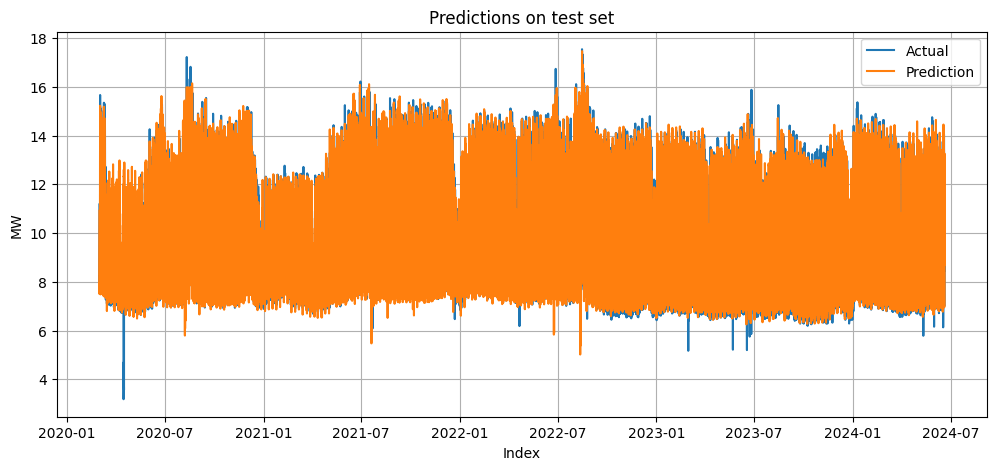

Mean Absolute Error (MAE): 0.35579031426378993
Mean Squared Error (MSE): 0.3511134556258294
Root Mean Squared Error (RMSE): 0.5925482728232607
R-squared (R²): 0.9369491055739539
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.643467
1    day_of_week    0.155932
0           hour    0.070238
30        lag_44    0.019901
13        lag_27    0.017069
9        holiday    0.011108
31        lag_45    0.008177
4           year    0.008001
34        lag_48    0.006962
16        lag_30    0.005407
29        lag_43    0.004785
15        lag_29    0.004282
12        lag_26    0.004236
5    day_of_year    0.003645
33        lag_47    0.003069
14        lag_28    0.002875
11        lag_25    0.002781
26        lag_40    0.002737
17        lag_31    0.002623
32        lag_46    0.002408
18        lag_32    0.001951
20        lag_34    0.001825
27        lag_41    0.001779
19        lag_33    0.001779
6   day_of_month    0.001707
25        lag_39   

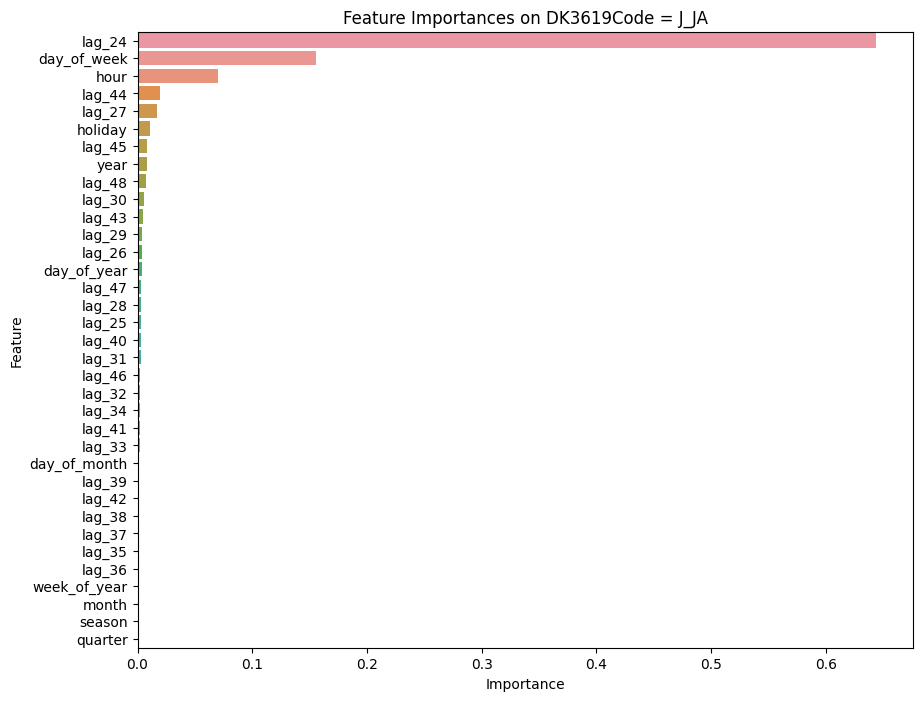

In [65]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'J_JA']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = J_JA')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = J_JB_JC

/tmp/ipykernel_25/252243076.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/252243076.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/252243076.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208786 to 1554
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK      actual  prediction  squared_error
1208786 2020-03-01 00:00:00  106.951012   99.895299      49.783088
1208754 2020-03-01 01:00:00  106.032234   99.450063      43.324974
1208722 2020-03-01 02:00:00  105.375542   99.232760      37.733771
1208690 2020-03-01 03:00:00  104.973473   99.104708      34.442398
1208658 2020-03-01 04:00:00  105.204659   98.894971      39.812164


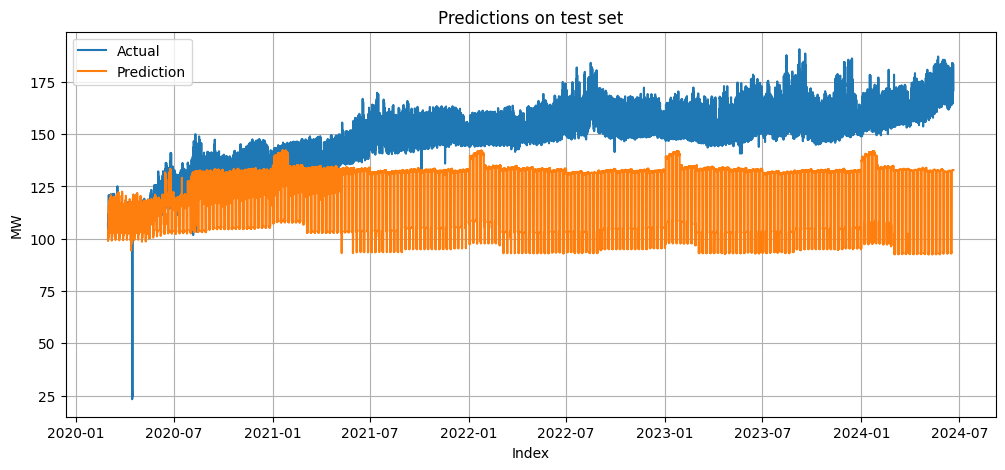

Mean Absolute Error (MAE): 27.656764591935453
Mean Squared Error (MSE): 1102.0985501009802
Root Mean Squared Error (RMSE): 33.19786966208796
R-squared (R²): -3.322790037907044
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.691561
11        lag_25    0.210306
34        lag_48    0.033033
12        lag_26    0.029388
1    day_of_week    0.008752
33        lag_47    0.007882
5    day_of_year    0.004018
4           year    0.002723
23        lag_37    0.001337
0           hour    0.001148
24        lag_38    0.001082
6   day_of_month    0.000816
25        lag_39    0.000780
7   week_of_year    0.000624
26        lag_40    0.000541
30        lag_44    0.000466
32        lag_46    0.000415
27        lag_41    0.000415
13        lag_27    0.000409
22        lag_36    0.000397
29        lag_43    0.000375
28        lag_42    0.000367
31        lag_45    0.000348
21        lag_35    0.000325
9        holiday    0.000306
18        lag_32    0

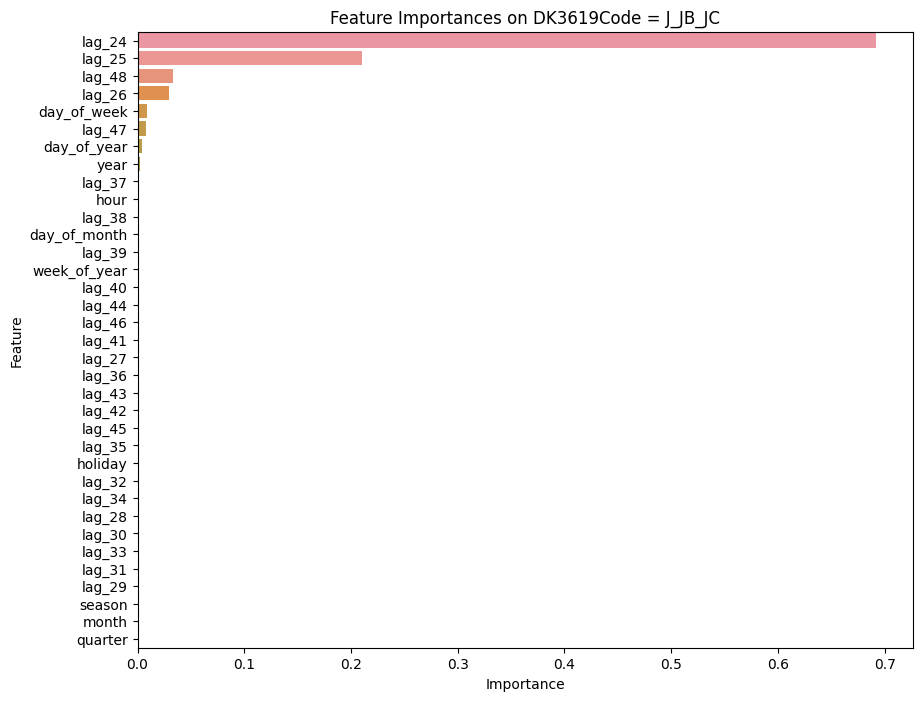

In [66]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'J_JB_JC']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = J_JB_JC')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = K_K

/tmp/ipykernel_25/3684965548.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/3684965548.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/3684965548.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208787 to 1555
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208787 2020-03-01 00:00:00  19.534952   19.279422       0.065296
1208755 2020-03-01 01:00:00  19.206573   18.805648       0.160741
1208723 2020-03-01 02:00:00  19.072079   18.683843       0.150727
1208691 2020-03-01 03:00:00  19.095064   18.645881       0.201766
1208659 2020-03-01 04:00:00  19.149738   18.716523       0.187675


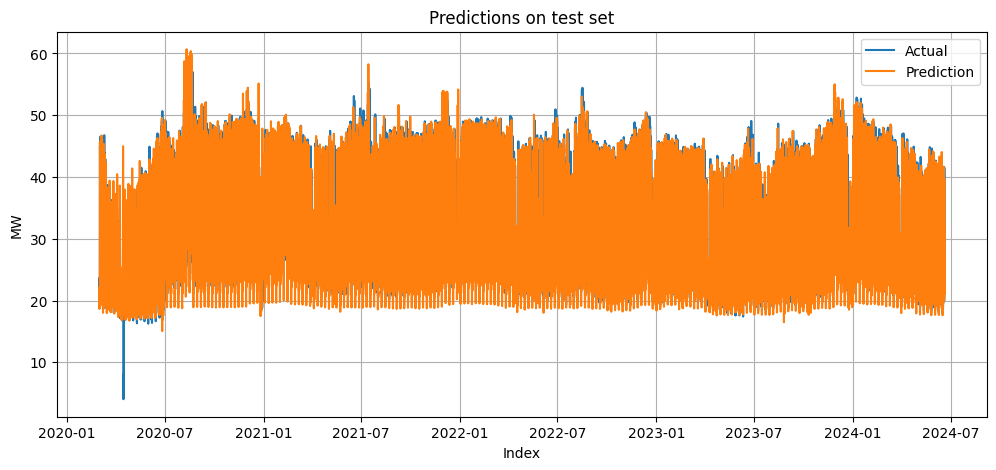

Mean Absolute Error (MAE): 1.6894228423076312
Mean Squared Error (MSE): 9.25066527585098
Root Mean Squared Error (RMSE): 3.041490633858829
R-squared (R²): 0.8883996060570425
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.808021
1    day_of_week    0.069950
23        lag_37    0.020169
0           hour    0.014038
24        lag_38    0.012986
22        lag_36    0.006528
4           year    0.005911
5    day_of_year    0.005297
9        holiday    0.004381
34        lag_48    0.004330
6   day_of_month    0.004306
25        lag_39    0.004068
11        lag_25    0.003725
26        lag_40    0.002933
21        lag_35    0.002875
7   week_of_year    0.002315
33        lag_47    0.002273
12        lag_26    0.001906
13        lag_27    0.001799
32        lag_46    0.001729
17        lag_31    0.001653
16        lag_30    0.001638
14        lag_28    0.001618
27        lag_41    0.001601
20        lag_34    0.001579
30        lag_44    0.0

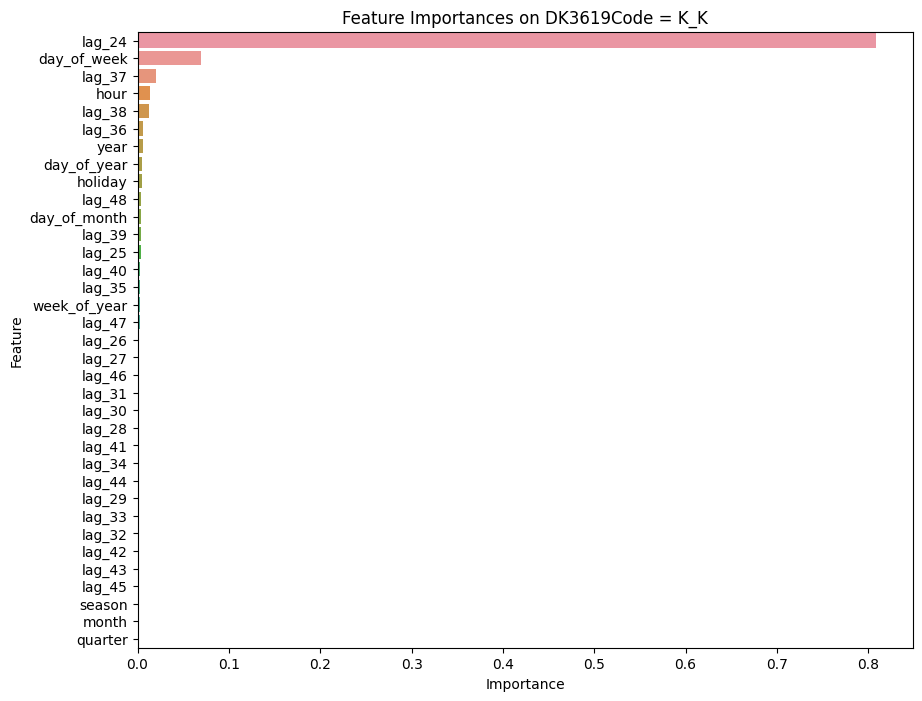

In [67]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'K_K']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = K_K')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = L_L

/tmp/ipykernel_25/1266139817.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1266139817.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1266139817.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208788 to 1556
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK      actual  prediction  squared_error
1208788 2020-03-01 00:00:00  130.392578  122.980461      54.939485
1208756 2020-03-01 01:00:00  126.892632  121.403369      30.132003
1208724 2020-03-01 02:00:00  124.660904  120.647871      16.104437
1208692 2020-03-01 03:00:00  123.351418  119.570810      14.292995
1208660 2020-03-01 04:00:00  123.629890  120.624645       9.031495


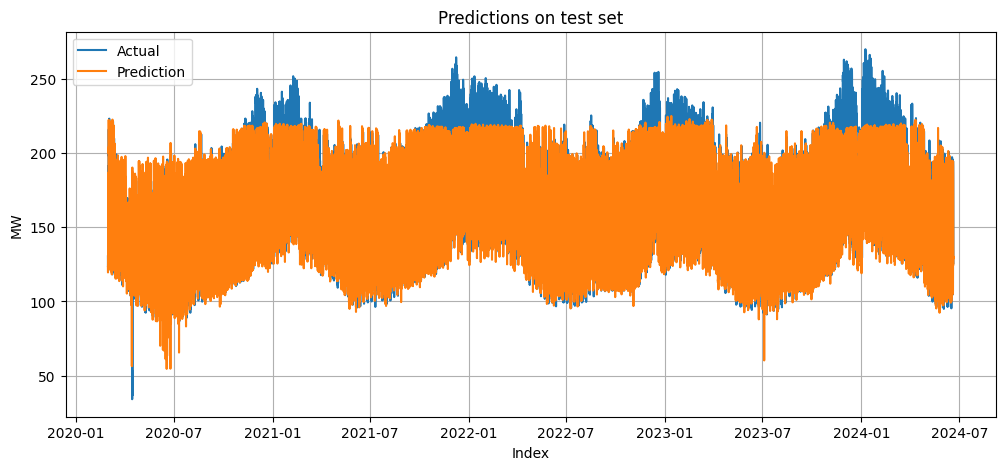

Mean Absolute Error (MAE): 6.622634265914864
Mean Squared Error (MSE): 117.40446224417633
Root Mean Squared Error (RMSE): 10.835333970126456
R-squared (R²): 0.914448198566682
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.904728
1    day_of_week    0.045212
32        lag_46    0.007057
25        lag_39    0.004904
34        lag_48    0.003291
31        lag_45    0.002987
24        lag_38    0.002851
9        holiday    0.002814
4           year    0.002402
26        lag_40    0.002131
30        lag_44    0.001911
29        lag_43    0.001829
33        lag_47    0.001759
28        lag_42    0.001652
27        lag_41    0.001567
11        lag_25    0.001265
5    day_of_year    0.001235
23        lag_37    0.001165
22        lag_36    0.000779
6   day_of_month    0.000774
17        lag_31    0.000768
12        lag_26    0.000747
18        lag_32    0.000717
19        lag_33    0.000687
16        lag_30    0.000646
0           hour    0.

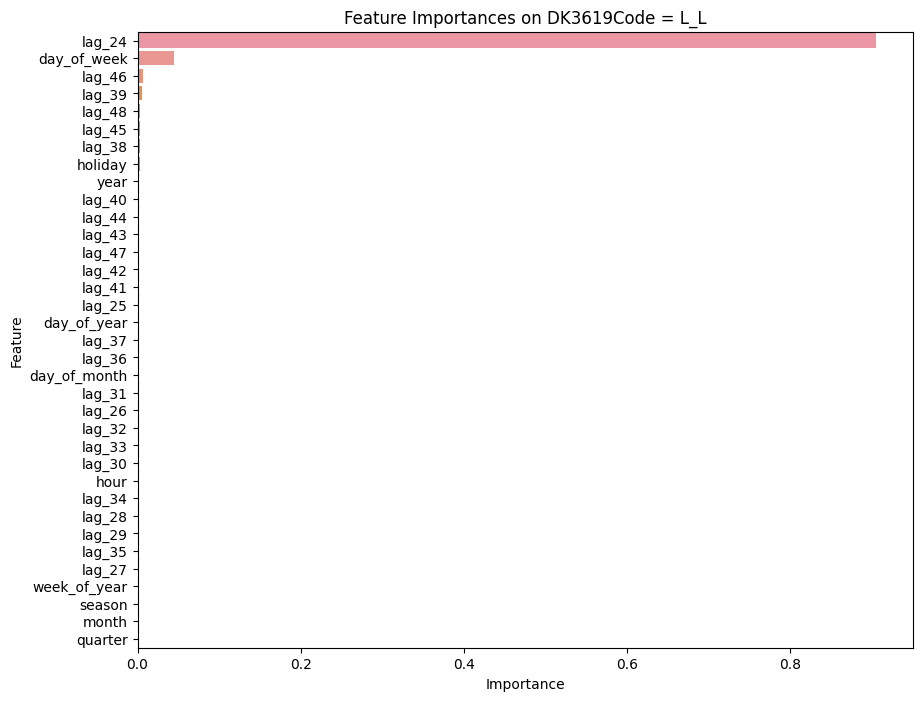

In [68]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'L_L']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = L_L')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = M_MA

/tmp/ipykernel_25/4104767694.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/4104767694.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/4104767694.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208789 to 1557
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208789 2020-03-01 00:00:00  32.316631   32.303467       0.000173
1208757 2020-03-01 01:00:00  31.509554   31.930479       0.177178
1208725 2020-03-01 02:00:00  31.603830   31.839178       0.055389
1208693 2020-03-01 03:00:00  31.697868   31.786899       0.007926
1208661 2020-03-01 04:00:00  31.886505   31.725630       0.025881


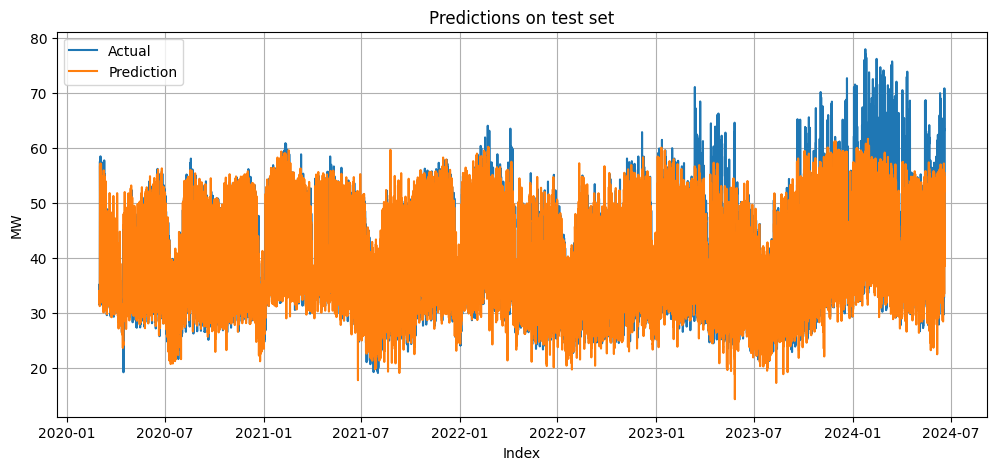

Mean Absolute Error (MAE): 2.554500875375991
Mean Squared Error (MSE): 18.913686730216988
Root Mean Squared Error (RMSE): 4.34898686250223
R-squared (R²): 0.7874894389520983
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.715888
1    day_of_week    0.150718
0           hour    0.022662
4           year    0.017908
9        holiday    0.009593
26        lag_40    0.007428
24        lag_38    0.005703
25        lag_39    0.005542
11        lag_25    0.005525
23        lag_37    0.005064
12        lag_26    0.004405
34        lag_48    0.004308
5    day_of_year    0.003876
6   day_of_month    0.003288
22        lag_36    0.002930
33        lag_47    0.002733
7   week_of_year    0.002650
27        lag_41    0.002548
13        lag_27    0.002366
19        lag_33    0.002160
14        lag_28    0.002047
32        lag_46    0.001957
18        lag_32    0.001913
20        lag_34    0.001864
15        lag_29    0.001780
21        lag_35    0.0

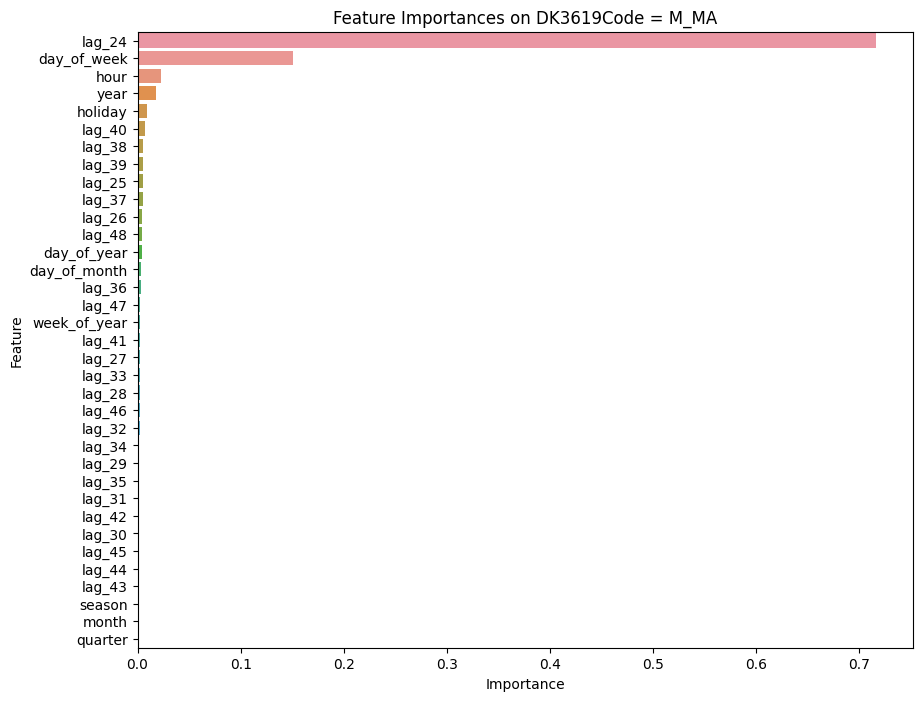

In [69]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'M_MA']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = M_MA')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = M_MB

/tmp/ipykernel_25/2096741473.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/2096741473.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/2096741473.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208790 to 1558
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208790 2020-03-01 00:00:00  10.791553   10.062515       0.531497
1208758 2020-03-01 01:00:00  10.632366    9.961128       0.450561
1208726 2020-03-01 02:00:00  10.481846    9.809591       0.451926
1208694 2020-03-01 03:00:00  10.520400    9.796718       0.523716
1208662 2020-03-01 04:00:00  10.592123   10.498765       0.008716


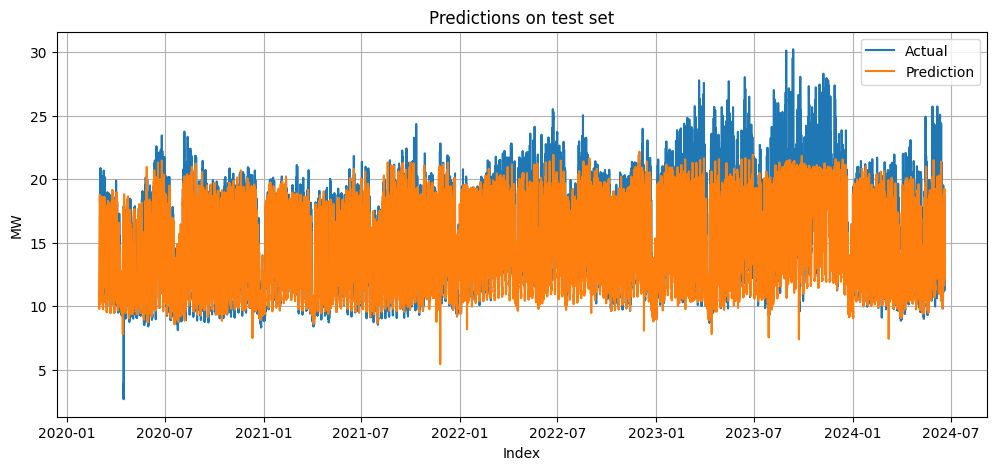

Mean Absolute Error (MAE): 1.0591305052858695
Mean Squared Error (MSE): 2.6925454314327895
Root Mean Squared Error (RMSE): 1.640897751669125
R-squared (R²): 0.8088272935474827
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.706678
1    day_of_week    0.153547
0           hour    0.035884
4           year    0.020740
9        holiday    0.008236
23        lag_37    0.007986
34        lag_48    0.005510
22        lag_36    0.004457
5    day_of_year    0.004144
24        lag_38    0.003960
6   day_of_month    0.003683
11        lag_25    0.003216
12        lag_26    0.003134
33        lag_47    0.003093
25        lag_39    0.002929
21        lag_35    0.002842
32        lag_46    0.002126
7   week_of_year    0.002120
13        lag_27    0.002014
31        lag_45    0.001963
20        lag_34    0.001868
18        lag_32    0.001764
19        lag_33    0.001707
14        lag_28    0.001705
15        lag_29    0.001666
26        lag_40    0

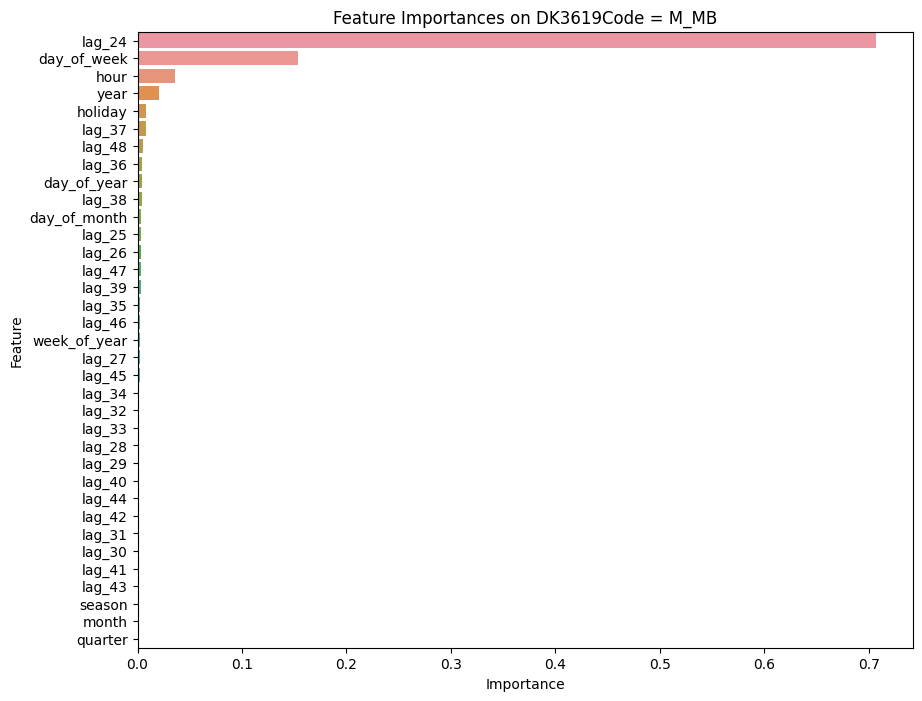

In [70]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'M_MB']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = M_MB')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = M_MC

/tmp/ipykernel_25/3307604933.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/3307604933.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/3307604933.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208791 to 1559
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK    actual  prediction  squared_error
1208791 2020-03-01 00:00:00  3.291238    3.149974       0.019956
1208759 2020-03-01 01:00:00  3.226019    3.108416       0.013830
1208727 2020-03-01 02:00:00  3.172010    3.042188       0.016854
1208695 2020-03-01 03:00:00  3.163788    3.018108       0.021223
1208663 2020-03-01 04:00:00  3.151184    3.035037       0.013490


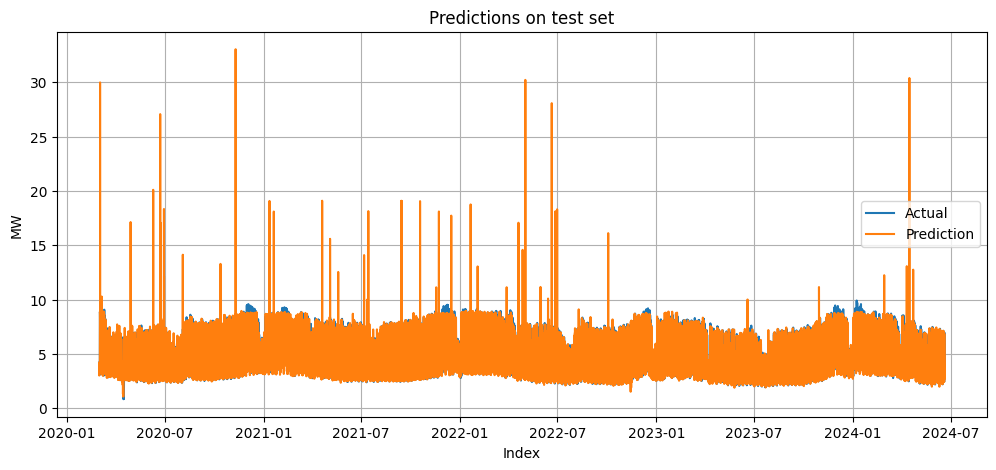

Mean Absolute Error (MAE): 0.20974745288944255
Mean Squared Error (MSE): 0.3042229228191915
Root Mean Squared Error (RMSE): 0.551564069550575
R-squared (R²): 0.9106144967251992
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.604407
1    day_of_week    0.097433
16        lag_30    0.037176
34        lag_48    0.031634
15        lag_29    0.030841
14        lag_28    0.027832
0           hour    0.017932
33        lag_47    0.015398
11        lag_25    0.011409
22        lag_36    0.009978
25        lag_39    0.008434
26        lag_40    0.008343
4           year    0.007828
13        lag_27    0.007821
20        lag_34    0.007651
17        lag_31    0.006778
23        lag_37    0.006707
32        lag_46    0.006006
31        lag_45    0.005627
9        holiday    0.005556
21        lag_35    0.005165
29        lag_43    0.004959
12        lag_26    0.004803
19        lag_33    0.004774
24        lag_38    0.004654
27        lag_41    

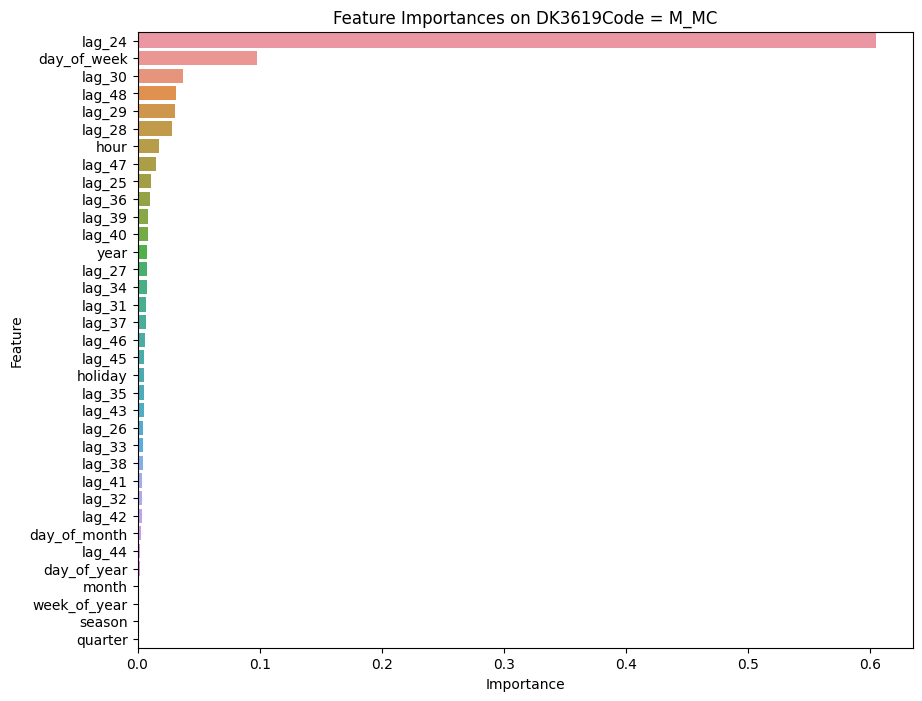

In [71]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'M_MC']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = M_MC')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = N_N

/tmp/ipykernel_25/2862786355.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/2862786355.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/2862786355.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208792 to 1560
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208792 2020-03-01 00:00:00  23.533768   22.525600       1.016403
1208760 2020-03-01 01:00:00  23.371161   21.873011       2.244455
1208728 2020-03-01 02:00:00  24.016176   22.561943       2.114793
1208696 2020-03-01 03:00:00  22.687298   21.848023       0.704383
1208664 2020-03-01 04:00:00  22.878052   22.573940       0.092484


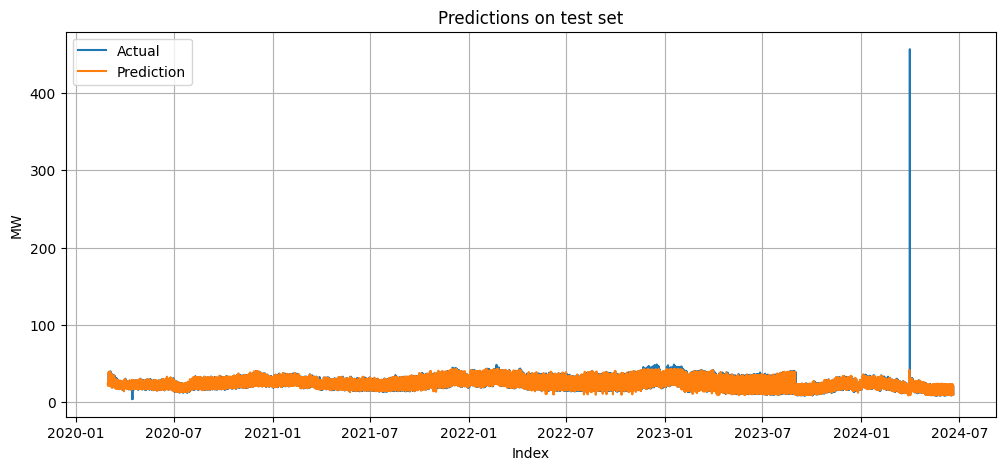

Mean Absolute Error (MAE): 1.2664945637530152
Mean Squared Error (MSE): 9.308094003665806
Root Mean Squared Error (RMSE): 3.0509169119570934
R-squared (R²): 0.8475194710046575
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.890281
1    day_of_week    0.056356
9        holiday    0.003734
4           year    0.003559
0           hour    0.003516
26        lag_40    0.003314
25        lag_39    0.002974
34        lag_48    0.002914
27        lag_41    0.002222
22        lag_36    0.002131
31        lag_45    0.001994
12        lag_26    0.001969
30        lag_44    0.001859
28        lag_42    0.001853
11        lag_25    0.001843
32        lag_46    0.001718
33        lag_47    0.001535
13        lag_27    0.001495
21        lag_35    0.001472
5    day_of_year    0.001280
24        lag_38    0.001091
16        lag_30    0.001077
23        lag_37    0.001065
29        lag_43    0.001021
6   day_of_month    0.000990
19        lag_33    0

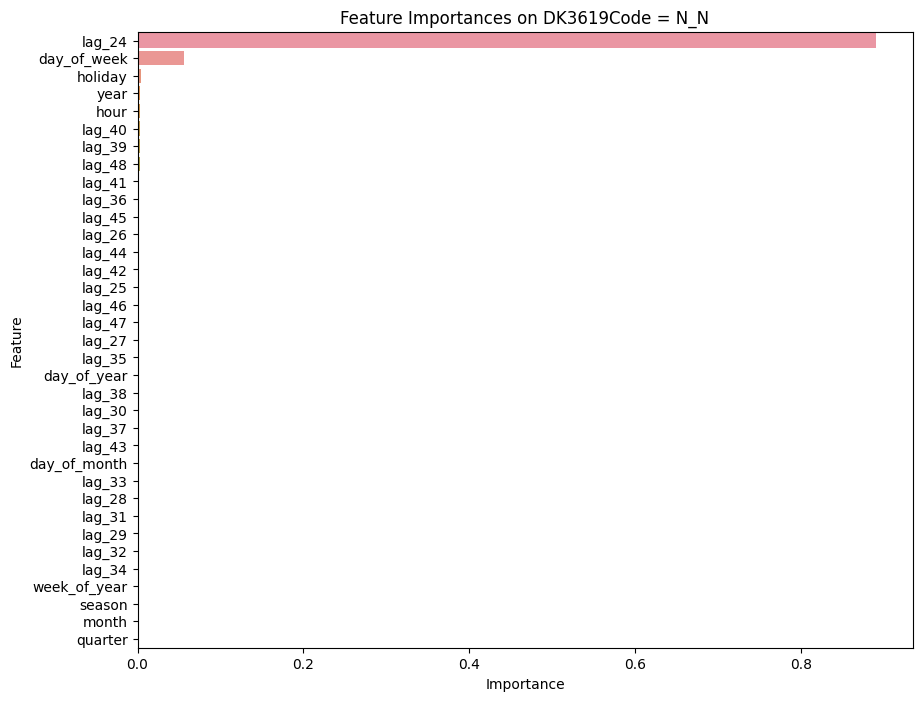

In [72]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'N_N']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = N_N')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = O_O

/tmp/ipykernel_25/3218293837.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/3218293837.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/3218293837.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208793 to 1561
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK      actual  prediction  squared_error
1208793 2020-03-01 00:00:00  175.462723  169.385046      36.938162
1208761 2020-03-01 01:00:00  171.903107  167.308254      21.112673
1208729 2020-03-01 02:00:00  170.750488  166.230331      20.431817
1208697 2020-03-01 03:00:00  170.761475  165.555112      27.106213
1208665 2020-03-01 04:00:00  171.597260  166.210535      29.016808


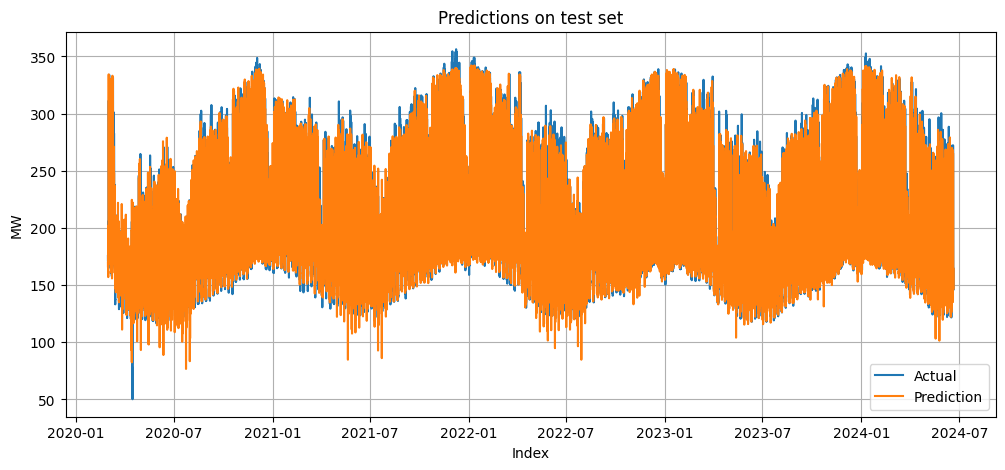

Mean Absolute Error (MAE): 6.081653894419116
Mean Squared Error (MSE): 119.18051008041135
Root Mean Squared Error (RMSE): 10.916982645420452
R-squared (R²): 0.952436599777434
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.772616
1    day_of_week    0.131657
0           hour    0.030672
22        lag_36    0.006735
9        holiday    0.006638
4           year    0.006053
23        lag_37    0.004553
11        lag_25    0.003824
26        lag_40    0.003780
24        lag_38    0.003419
34        lag_48    0.003286
27        lag_41    0.002805
19        lag_33    0.002537
25        lag_39    0.002522
5    day_of_year    0.001752
33        lag_47    0.001689
21        lag_35    0.001515
20        lag_34    0.001200
12        lag_26    0.001129
18        lag_32    0.001121
6   day_of_month    0.001099
32        lag_46    0.000900
28        lag_42    0.000887
17        lag_31    0.000872
16        lag_30    0.000821
15        lag_29    0.

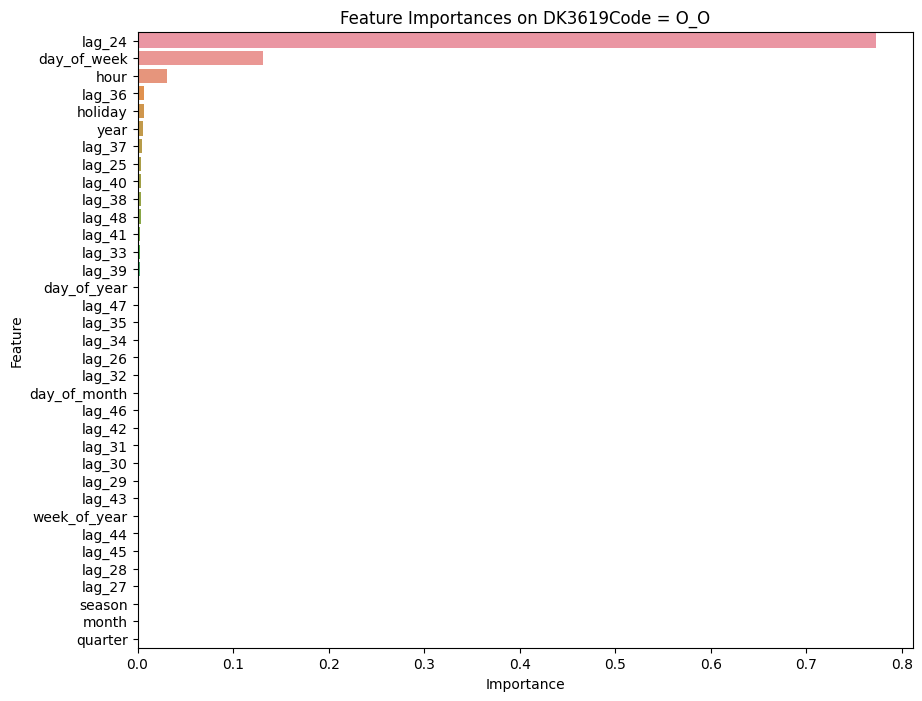

In [73]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'O_O']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = O_O')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = P_P

/tmp/ipykernel_25/1272615960.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1272615960.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1272615960.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208794 to 1562
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208794 2020-03-01 00:00:00  45.662540   44.326780       1.784255
1208762 2020-03-01 01:00:00  45.186043   44.127551       1.120405
1208730 2020-03-01 02:00:00  44.750805   43.763984       0.973816
1208698 2020-03-01 03:00:00  44.468536   43.534671       0.872103
1208666 2020-03-01 04:00:00  44.513264   43.669337       0.712213


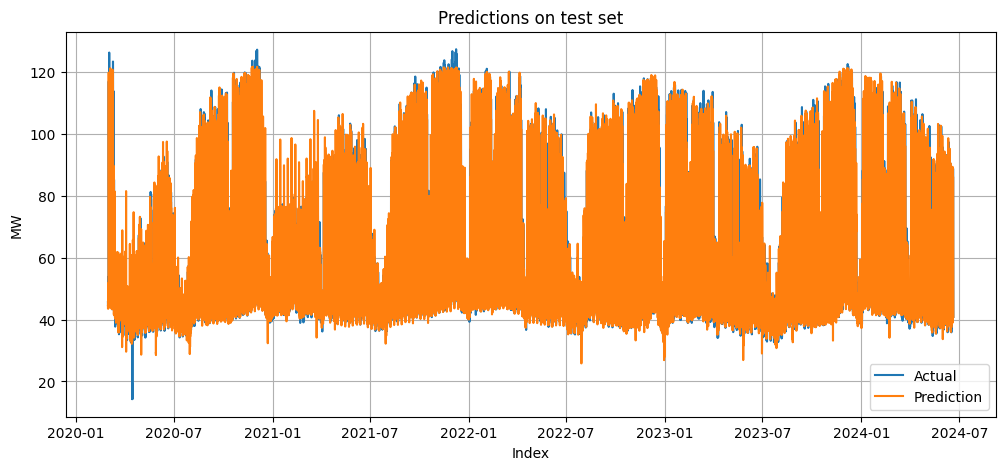

Mean Absolute Error (MAE): 1.9939365928783095
Mean Squared Error (MSE): 16.64442099752031
Root Mean Squared Error (RMSE): 4.07975746797776
R-squared (R²): 0.9612697218962386
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.636629
1    day_of_week    0.226698
0           hour    0.052157
11        lag_25    0.014405
26        lag_40    0.012619
9        holiday    0.009092
4           year    0.006286
18        lag_32    0.004677
34        lag_48    0.003940
27        lag_41    0.003193
5    day_of_year    0.002343
25        lag_39    0.002156
28        lag_42    0.002122
12        lag_26    0.002101
17        lag_31    0.001796
13        lag_27    0.001784
33        lag_47    0.001760
19        lag_33    0.001751
14        lag_28    0.001239
24        lag_38    0.001188
29        lag_43    0.001130
32        lag_46    0.001101
7   week_of_year    0.001041
31        lag_45    0.001024
30        lag_44    0.000946
6   day_of_month    0.0

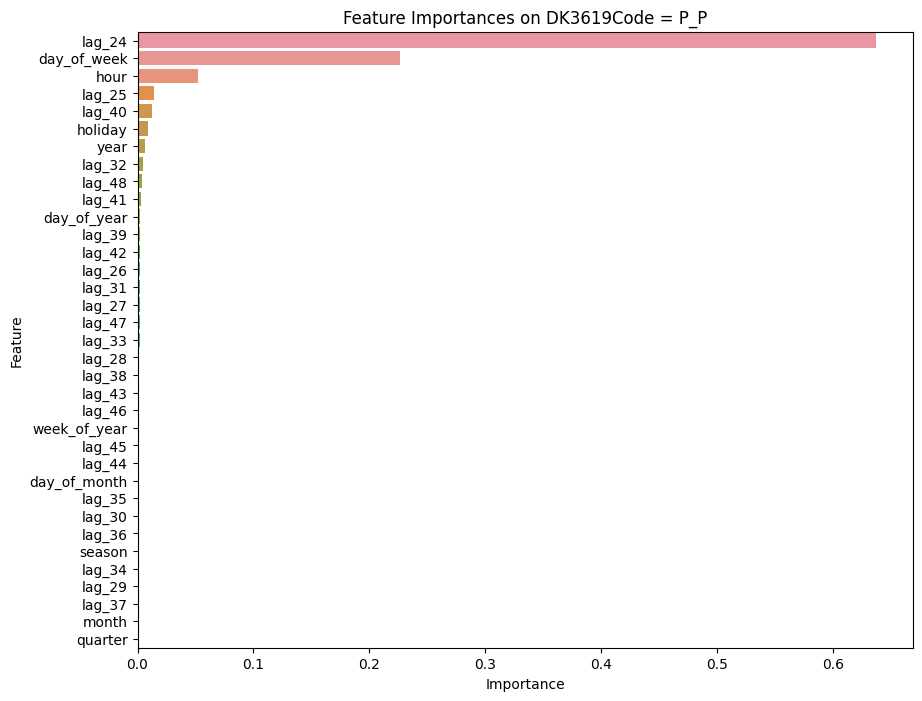

In [74]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'P_P']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = P_P')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = PR_PR

/tmp/ipykernel_25/1193854296.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1193854296.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1193854296.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208795 to 1563
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.4 MB
None
                     HourDK      actual  prediction  squared_error
1208795 2020-03-01 00:00:00  927.993652  977.106991    2412.120069
1208763 2020-03-01 01:00:00  857.055786  906.416878    2436.517355
1208731 2020-03-01 02:00:00  816.468506  802.996801     181.486832
1208699 2020-03-01 03:00:00  796.873291  774.691053     492.051663
1208667 2020-03-01 04:00:00  791.190125  770.894061     411.930203


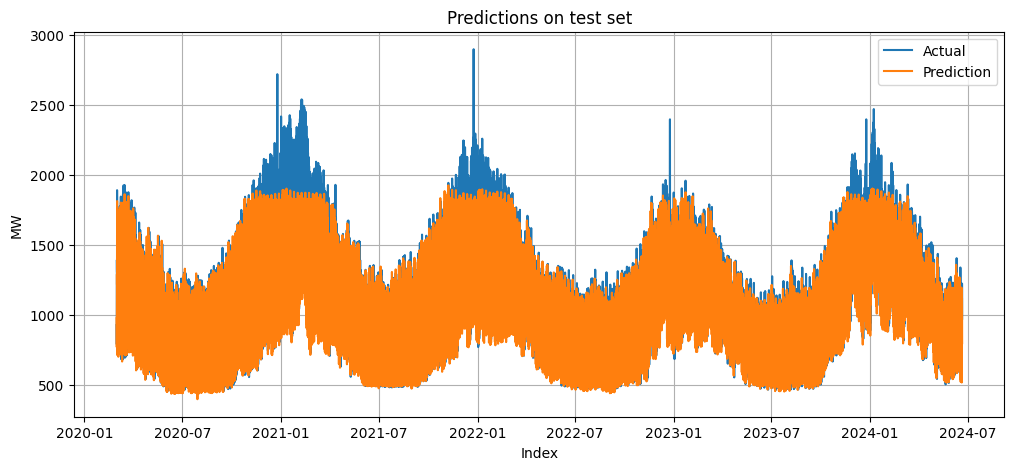

Mean Absolute Error (MAE): 58.63966494080235
Mean Squared Error (MSE): 7937.058483714772
Root Mean Squared Error (RMSE): 89.09017052242504
R-squared (R²): 0.9309560606718992
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.904778
34        lag_48    0.022865
1    day_of_week    0.011717
24        lag_38    0.005323
25        lag_39    0.004807
17        lag_31    0.004653
16        lag_30    0.004556
26        lag_40    0.002907
33        lag_47    0.002397
18        lag_32    0.002376
32        lag_46    0.002341
6   day_of_month    0.002305
11        lag_25    0.002225
19        lag_33    0.002092
5    day_of_year    0.002013
0           hour    0.001925
31        lag_45    0.001711
27        lag_41    0.001672
12        lag_26    0.001575
23        lag_37    0.001566
15        lag_29    0.001517
20        lag_34    0.001367
9        holiday    0.001364
14        lag_28    0.001238
21        lag_35    0.001232
28        lag_42    0.0

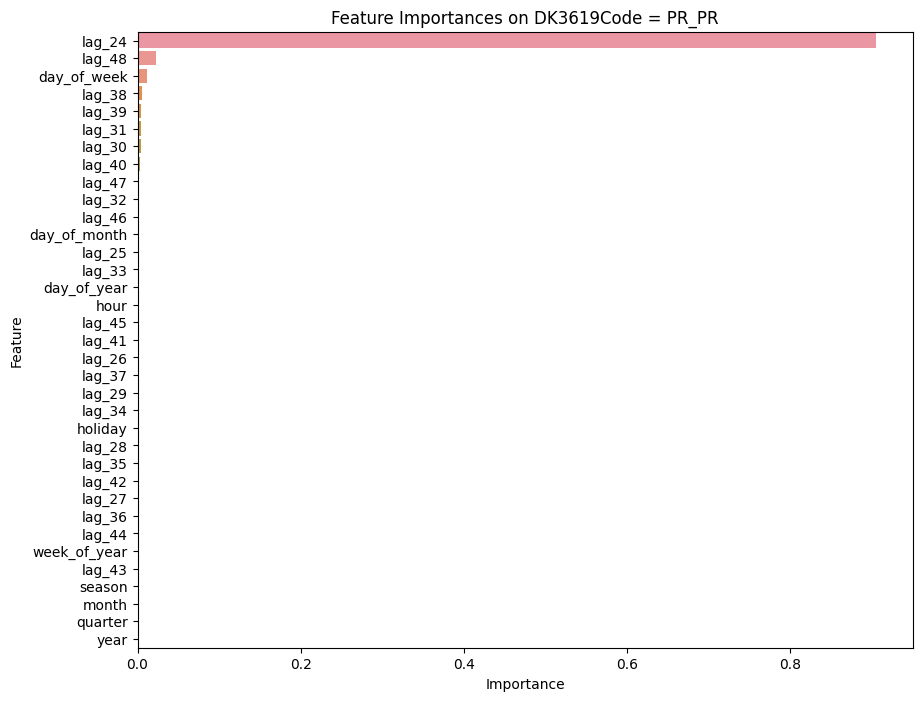

In [75]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'PR_PR']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = PR_PR')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = Q_QA

/tmp/ipykernel_25/1947459824.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1947459824.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1947459824.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208796 to 1564
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK    actual  prediction  squared_error
1208796 2020-03-01 00:00:00  3.658330    3.388718       0.072691
1208764 2020-03-01 01:00:00  3.582249    3.323351       0.067028
1208732 2020-03-01 02:00:00  3.574689    3.246042       0.108009
1208700 2020-03-01 03:00:00  3.567788    3.233174       0.111967
1208668 2020-03-01 04:00:00  3.558290    3.196784       0.130686


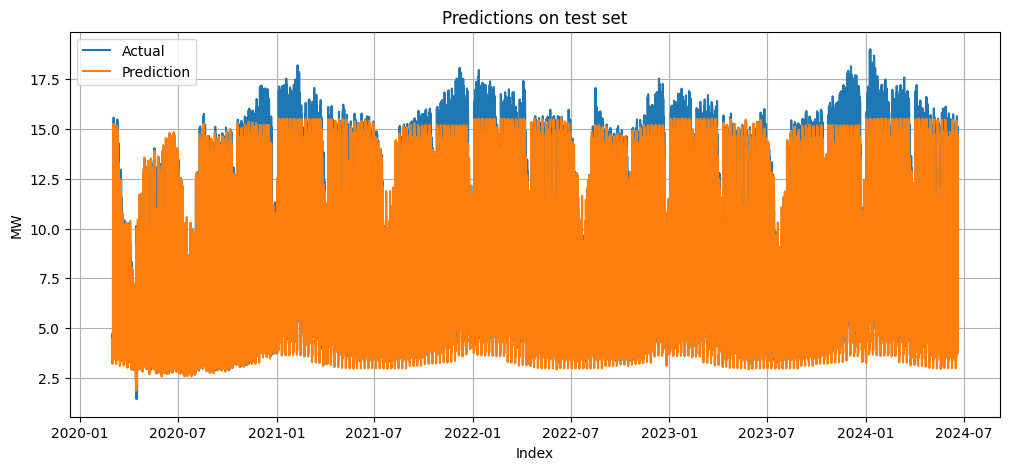

Mean Absolute Error (MAE): 0.5465590921835822
Mean Squared Error (MSE): 1.0267504498820257
Root Mean Squared Error (RMSE): 1.0132869533760047
R-squared (R²): 0.9407768008640722
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.776695
1    day_of_week    0.153308
0           hour    0.019590
9        holiday    0.012200
4           year    0.006662
24        lag_38    0.006453
25        lag_39    0.002485
34        lag_48    0.002278
33        lag_47    0.001645
11        lag_25    0.001510
23        lag_37    0.001490
5    day_of_year    0.001133
26        lag_40    0.001111
19        lag_33    0.001090
18        lag_32    0.000960
32        lag_46    0.000862
29        lag_43    0.000769
22        lag_36    0.000765
6   day_of_month    0.000765
12        lag_26    0.000674
30        lag_44    0.000663
27        lag_41    0.000658
28        lag_42    0.000656
31        lag_45    0.000622
17        lag_31    0.000619
16        lag_30    

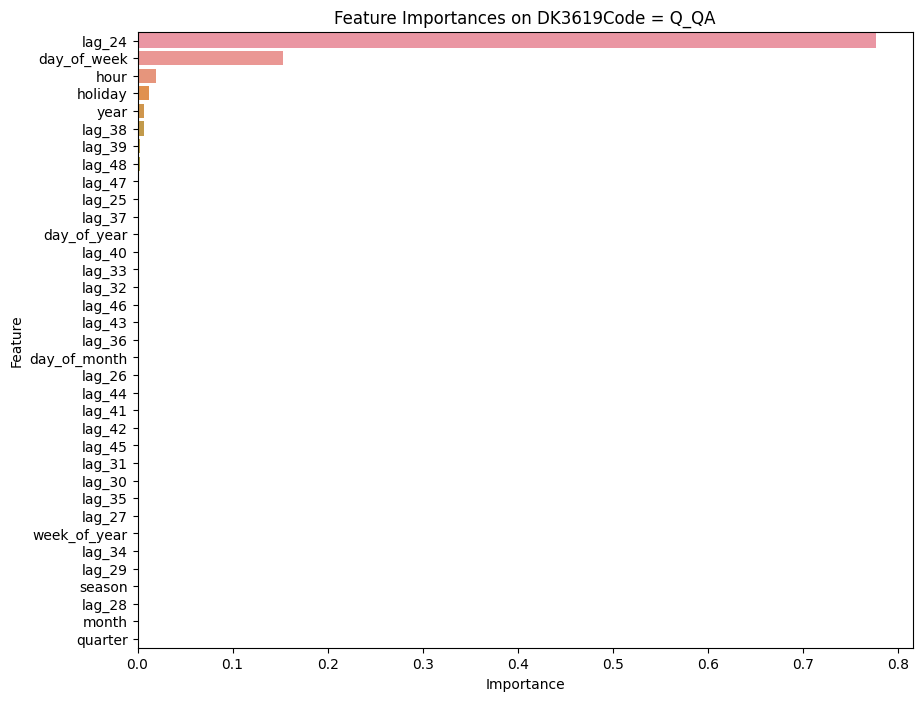

In [76]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'Q_QA']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = Q_QA')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = Q_QB

/tmp/ipykernel_25/1246939194.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1246939194.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1246939194.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208797 to 1565
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK    actual  prediction  squared_error
1208797 2020-03-01 00:00:00  8.781033    8.109853       0.450482
1208765 2020-03-01 01:00:00  8.503461    8.052995       0.202920
1208733 2020-03-01 02:00:00  8.328962    7.981254       0.120901
1208701 2020-03-01 03:00:00  8.168691    7.917260       0.063218
1208669 2020-03-01 04:00:00  8.157410    7.917866       0.057382


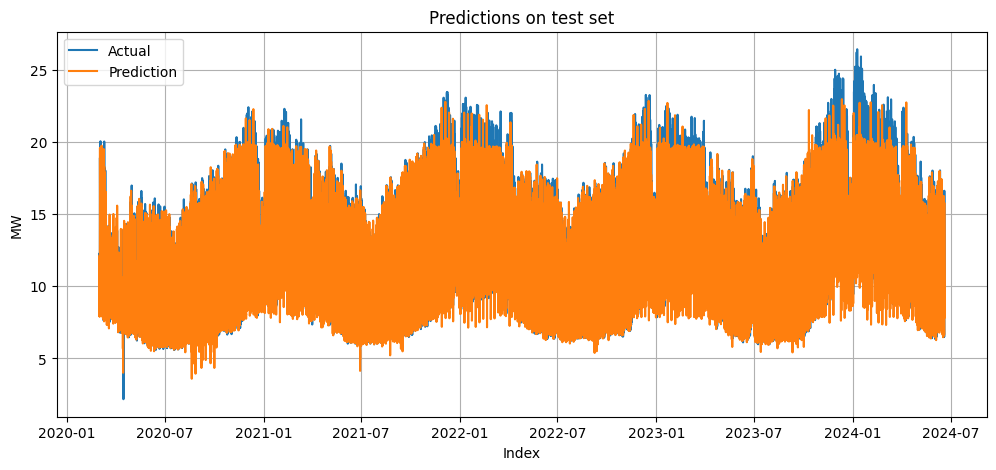

Mean Absolute Error (MAE): 0.6626269145431655
Mean Squared Error (MSE): 1.4112004837010608
Root Mean Squared Error (RMSE): 1.1879395959816563
R-squared (R²): 0.9017797484025798
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.853659
1    day_of_week    0.082557
34        lag_48    0.006967
26        lag_40    0.006562
25        lag_39    0.005468
9        holiday    0.004744
24        lag_38    0.004274
27        lag_41    0.003099
0           hour    0.002842
33        lag_47    0.002769
17        lag_31    0.002543
4           year    0.002078
11        lag_25    0.002068
18        lag_32    0.001582
28        lag_42    0.001309
12        lag_26    0.001290
32        lag_46    0.001228
29        lag_43    0.001226
5    day_of_year    0.001185
20        lag_34    0.001148
30        lag_44    0.001087
31        lag_45    0.001067
19        lag_33    0.001065
23        lag_37    0.001046
16        lag_30    0.000910
21        lag_35    

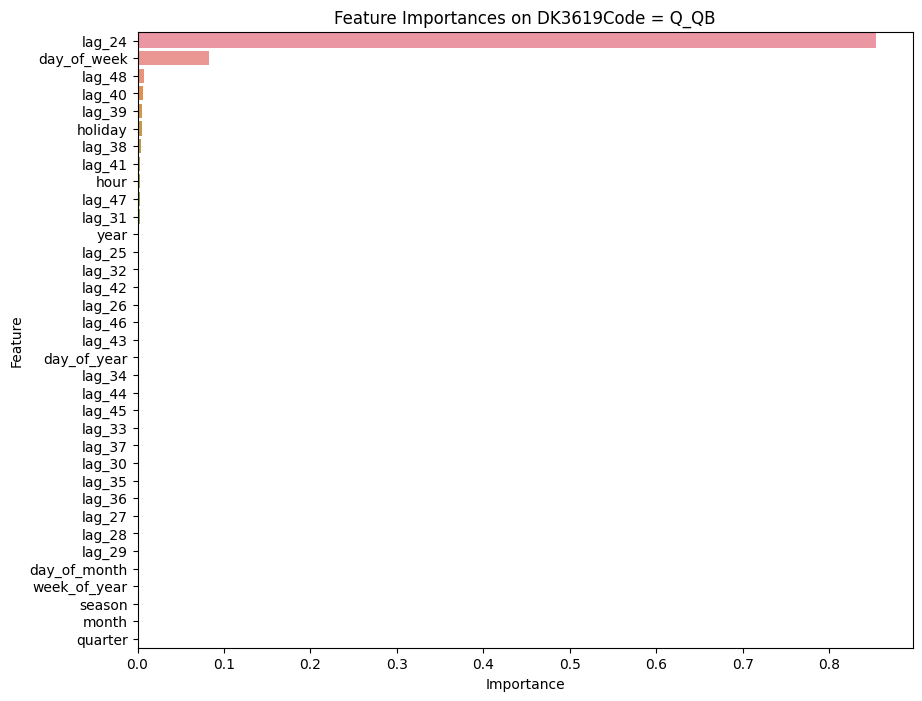

In [77]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'Q_QB']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = Q_QB')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = R_R

/tmp/ipykernel_25/1653030032.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1653030032.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/1653030032.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208798 to 1566
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208798 2020-03-01 00:00:00  24.949780   25.133847       0.033881
1208766 2020-03-01 01:00:00  23.856276   24.143172       0.082310
1208734 2020-03-01 02:00:00  23.235065   23.358608       0.015263
1208702 2020-03-01 03:00:00  22.906387   23.109824       0.041386
1208670 2020-03-01 04:00:00  23.187037   23.103838       0.006922


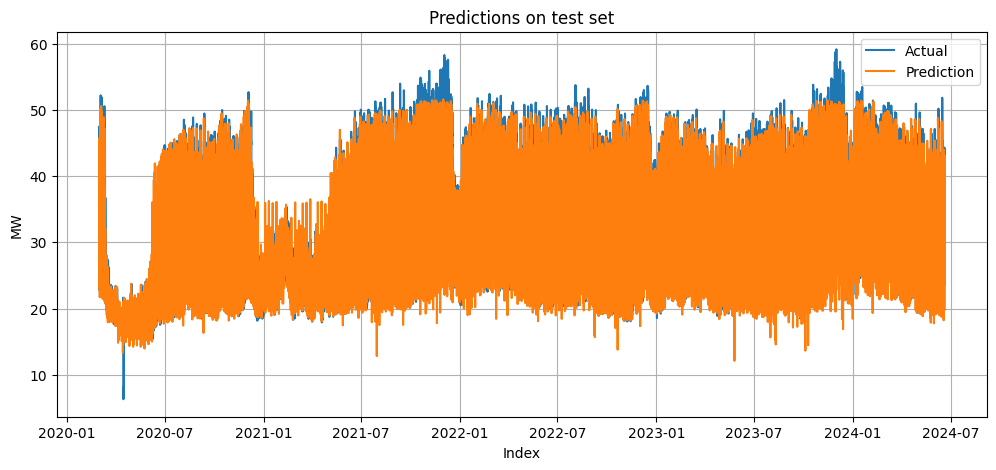

Mean Absolute Error (MAE): 1.2093812590539932
Mean Squared Error (MSE): 3.757586046696626
Root Mean Squared Error (RMSE): 1.9384493923485921
R-squared (R²): 0.9621093269931523
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.951024
1    day_of_week    0.012979
34        lag_48    0.006825
23        lag_37    0.002688
5    day_of_year    0.002173
14        lag_28    0.001901
0           hour    0.001616
33        lag_47    0.001528
15        lag_29    0.001513
24        lag_38    0.001302
32        lag_46    0.001268
6   day_of_month    0.001092
4           year    0.001082
11        lag_25    0.000911
9        holiday    0.000829
16        lag_30    0.000812
21        lag_35    0.000802
25        lag_39    0.000780
31        lag_45    0.000756
12        lag_26    0.000744
13        lag_27    0.000676
7   week_of_year    0.000652
22        lag_36    0.000642
29        lag_43    0.000632
28        lag_42    0.000616
26        lag_40    0

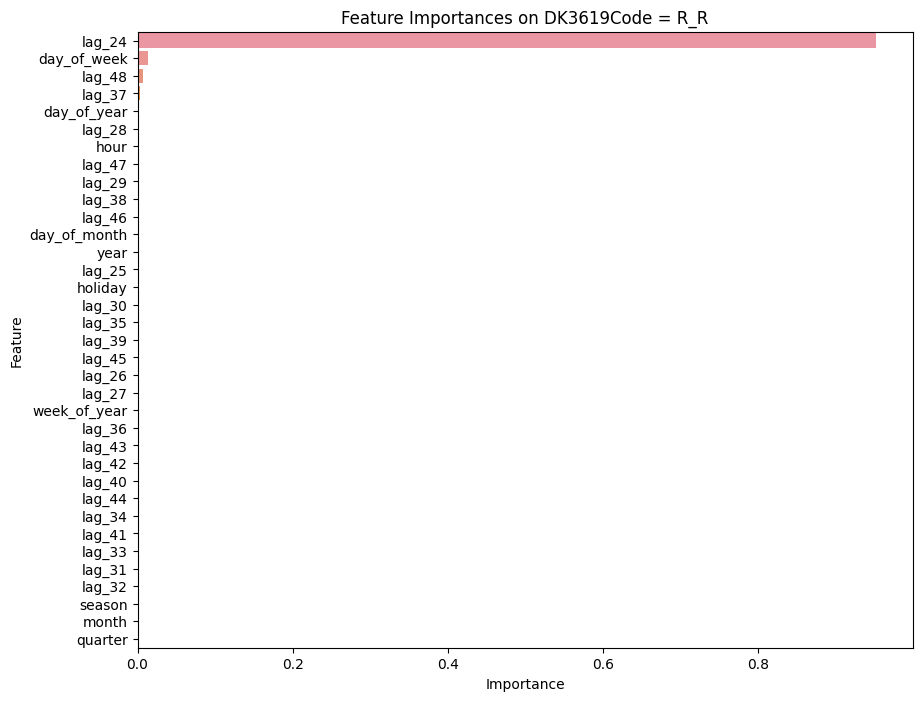

In [78]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'R_R']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = R_R')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## DK3619Code = S_S

/tmp/ipykernel_25/797574421.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/797574421.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_25/797574421.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208799 to 1567
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HourDK         37727 non-null  datetime64[ns]
 1   actual         37727 non-null  float64       
 2   prediction     37727 non-null  float64       
 3   squared_error  37727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.4 MB
None
                     HourDK     actual  prediction  squared_error
1208799 2020-03-01 00:00:00  31.687231   30.340692       1.813168
1208767 2020-03-01 01:00:00  32.014797   30.812333       1.445920
1208735 2020-03-01 02:00:00  32.760963   31.291519       2.159265
1208703 2020-03-01 03:00:00  34.403473   32.400979       4.009982
1208671 2020-03-01 04:00:00  36.015797   32.473310      12.549214


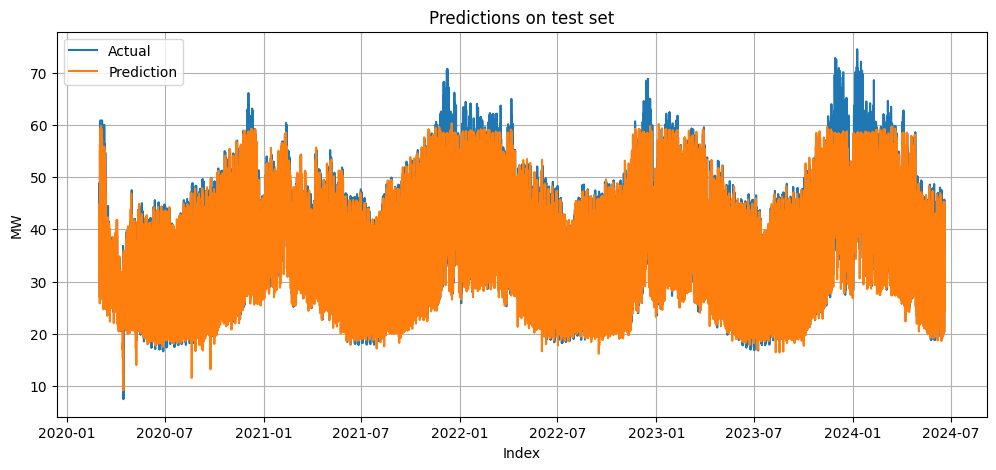

Mean Absolute Error (MAE): 1.7392709110978875
Mean Squared Error (MSE): 7.4959818923724
Root Mean Squared Error (RMSE): 2.737879086514304
R-squared (R²): 0.9360988912213494
Number of features: 35
Number of importances: 35
         Feature  Importance
10        lag_24    0.894402
1    day_of_week    0.046753
0           hour    0.008269
4           year    0.007216
34        lag_48    0.005005
9        holiday    0.002909
22        lag_36    0.002442
23        lag_37    0.002239
11        lag_25    0.002169
25        lag_39    0.002108
33        lag_47    0.001875
24        lag_38    0.001819
14        lag_28    0.001750
26        lag_40    0.001682
5    day_of_year    0.001515
28        lag_42    0.001496
31        lag_45    0.001397
32        lag_46    0.001296
21        lag_35    0.001242
13        lag_27    0.001142
27        lag_41    0.001108
29        lag_43    0.001102
16        lag_30    0.001067
30        lag_44    0.001014
18        lag_32    0.001001
17        lag_31    0.00

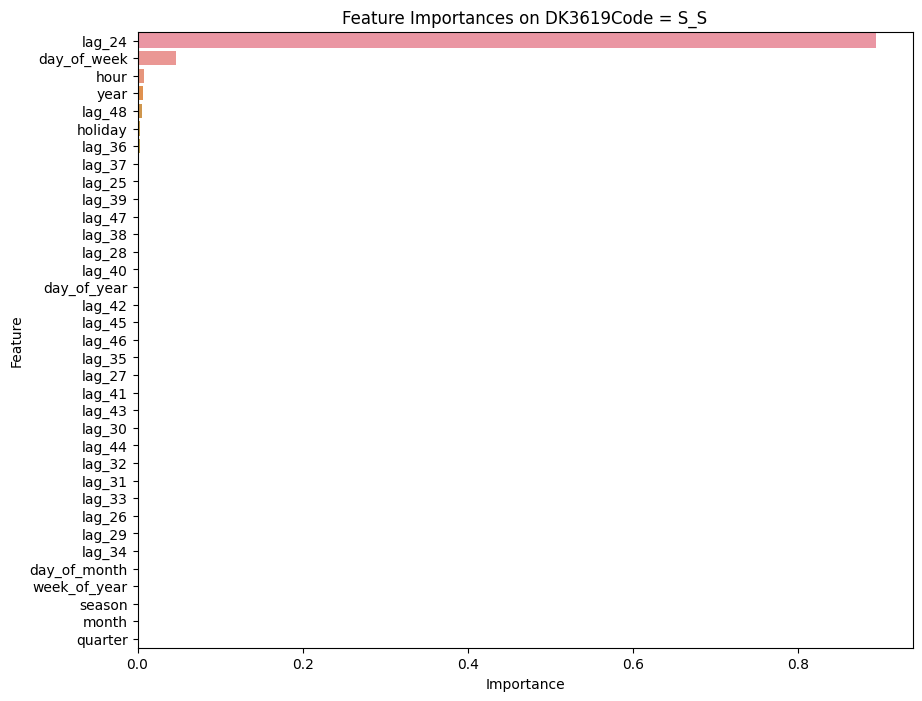

In [79]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()


columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'S_S']

df_corr = df_filter[columns]


df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])


rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_model, x_test, y_test)
pred_df.head()

df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)


# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df = pred_df[['HourDK','actual','prediction','squared_error']]

print(pred_df.info(show_counts = True))

print(pred_df.head())


plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()




# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = S_S')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Sau khi đã chọn được feature

In [80]:
columns = ['HourUTC', 'HourDK', 
           'hour', 
           'day_of_week',
           'year', 
           'lag_24',
           'lag_47',
           'Consumption_MWh']


df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'M_MA']

df_corr = df_filter[columns]
#df_corr = pd.get_dummies(df_corr, columns=['DK3619Code'], prefix=['DK3619Code'])

# Convert holiday to binary indicator
#df_corr['holiday'] = df_corr['holiday'].apply(lambda x: 0 if x == 0 else 1)

In [81]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105623 entries, 1557 to 3323746
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   HourUTC          105623 non-null  object 
 1   HourDK           105623 non-null  object 
 2   hour             105623 non-null  int64  
 3   day_of_week      105623 non-null  int64  
 4   year             105623 non-null  int64  
 5   lag_24           105623 non-null  float64
 6   lag_47           105623 non-null  float64
 7   Consumption_MWh  105623 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 7.3+ MB


In [82]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)

# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])

/tmp/ipykernel_25/2224914049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/2224914049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


In [83]:
df_train.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 67200 entries, 3323746 to 1231093
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hour             67200 non-null  int64  
 1   day_of_week      67200 non-null  int64  
 2   year             67200 non-null  int64  
 3   lag_24           67200 non-null  float64
 4   lag_47           67200 non-null  float64
 5   Consumption_MWh  67200 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.6 MB


In [84]:
rf_feature_model = RandomForestRegressor(n_estimators=1000, random_state=10)
rf_feature_model.fit(x_train, y_train)

/tmp/ipykernel_25/1427580338.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_feature_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=10)

In [85]:
y_pred = rf_feature_model.predict(x_test)
y_pred

array([32.31328325, 31.08001364, 30.56801916, ..., 39.45469454,
       38.02098309, 38.66503363])

In [86]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 3.318611885196033
Mean Squared Error (MSE): 29.72741804208422
Root Mean Squared Error (RMSE): 5.4522855796522816
R-squared (R²): 0.6659884253800181


In [87]:
def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_feature_model, x_test, y_test)
pred_df.head()

actual  prediction  squared_error
1208789  32.316631   32.313283       0.000011
1208757  31.509554   31.080014       0.184505
1208725  31.603830   30.568019       1.072904
1208693  31.697868   30.684575       1.026763
1208661  31.886505   31.106117       0.609006

In [88]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)

In [89]:
df_test.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208789 to 1557
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   HourUTC          37727 non-null  datetime64[ns]
 1   HourDK           37727 non-null  datetime64[ns]
 2   hour             37727 non-null  int64         
 3   day_of_week      37727 non-null  int64         
 4   year             37727 non-null  int64         
 5   lag_24           37727 non-null  float64       
 6   lag_47           37727 non-null  float64       
 7   Consumption_MWh  37727 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 2.6 MB


In [90]:
# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 37727 entries, 1208789 to 1557
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   HourUTC          37727 non-null  datetime64[ns]
 1   HourDK           37727 non-null  datetime64[ns]
 2   hour             37727 non-null  int64         
 3   day_of_week      37727 non-null  int64         
 4   year             37727 non-null  int64         
 5   lag_24           37727 non-null  float64       
 6   lag_47           37727 non-null  float64       
 7   Consumption_MWh  37727 non-null  float64       
 8   actual           37727 non-null  float64       
 9   prediction       37727 non-null  float64       
 10  squared_error    37727 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 4.5 MB


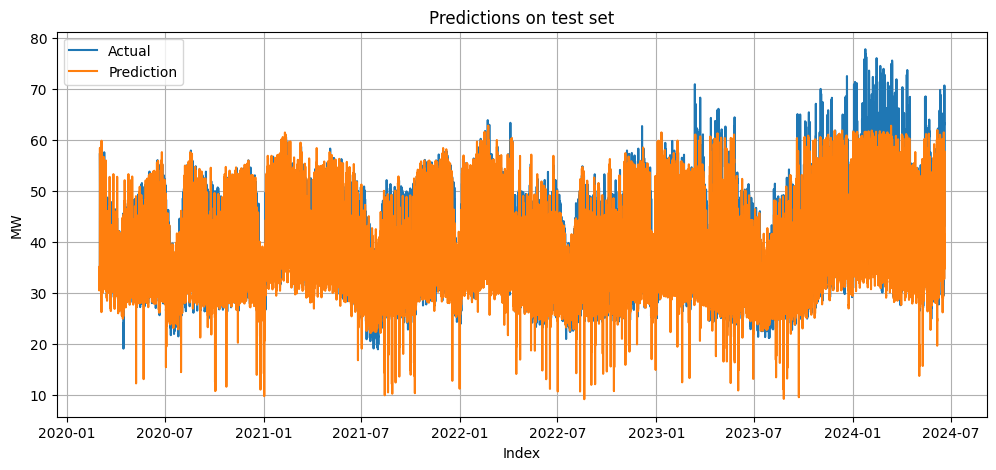

In [91]:
plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

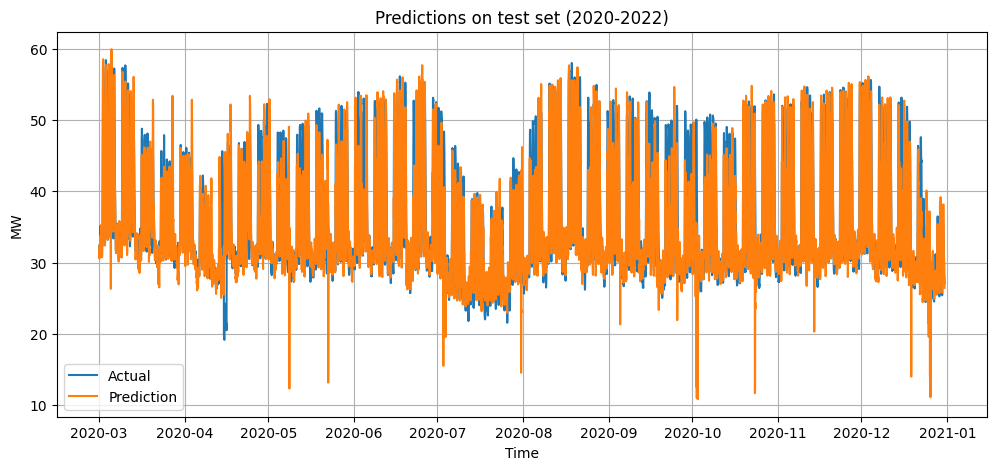

In [92]:
# Filter pred_df based on the desired timeframe (assuming HourDK is a datetime column)
pred_df_filtered = pred_df[(pred_df['HourDK'] >= '2020-01-01') & (pred_df['HourDK'] <= '2020-12-31')]

plt.figure(figsize=(12, 5))
plt.plot(pred_df_filtered['HourDK'], pred_df_filtered['actual'], label='Actual')
plt.plot(pred_df_filtered['HourDK'], pred_df_filtered['prediction'], label='Prediction')
plt.title('Predictions on test set (2020-2022)')
plt.xlabel('Time')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

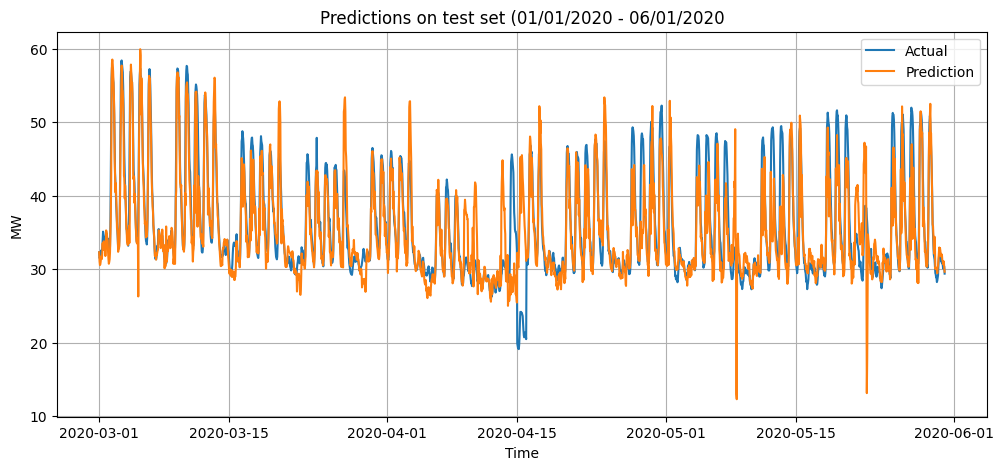

In [93]:
# Filter pred_df based on the desired timeframe (assuming HourDK is a datetime column)
pred_df_filtered = pred_df[(pred_df['HourDK'] >= '2020-01-01') & (pred_df['HourDK'] <= '2020-05-31')]

plt.figure(figsize=(12, 5))
plt.plot(pred_df_filtered['HourDK'], pred_df_filtered['actual'], label='Actual')
plt.plot(pred_df_filtered['HourDK'], pred_df_filtered['prediction'], label='Prediction')
plt.title('Predictions on test set (01/01/2020 - 06/01/2020')
plt.xlabel('Time')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()